 ***Cancer Vision: Advanced Breast Cancer Prediction With Deep Learning***

```
TEAM ID: NM2023TMID20235
913120106025 - EUGENE JOSE PUSHPA G
913120106023 - DIVYA S D
913120106040 - KEERTHIKA K H
913120106105 - VAISHNAVI M Y

```

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

In [ ]:
base_dir = '/content/drive/MyDrive/dataset'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')

# Directory with our training pictures
train_benign_dir = os.path.join(train_dir, 'benign')
train_malignant_dir = os.path.join(train_dir, 'malignant')

# Directory with our validation pictures
validation_benign_dir = os.path.join(validation_dir, 'benign')
validation_malignant_dir = os.path.join(validation_dir, 'malignant')

In [ ]:
train_benign_fnames = os.listdir( train_benign_dir )
train_malignant_fnames = os.listdir( train_malignant_dir )

print(train_benign_fnames[:10])
print(train_malignant_fnames[:10])

['10254_idx5_x2001_y351_class0.png', '10257_idx5_x1351_y1551_class0.png', '10257_idx5_x1801_y551_class0.png', '10257_idx5_x2151_y951_class0.png', '10254_idx5_x751_y551_class0.png', '10257_idx5_x1401_y1201_class0.png', '10257_idx5_x551_y1501_class0.png', '10254_idx5_x651_y851_class0.png', '10257_idx5_x1951_y1251_class0.png', '10255_idx5_x2151_y1151_class0.png']
['8863_idx5_x1451_y1201_class1.png', '8863_idx5_x1601_y1351_class1.png', '8863_idx5_x1151_y801_class1.png', '8863_idx5_x1501_y1601_class1.png', '8863_idx5_x1151_y1551_class1.png', '8863_idx5_x1001_y1551_class1.png', '8863_idx5_x1051_y851_class1.png', '8863_idx5_x1751_y1601_class1.png', '8863_idx5_x1401_y1001_class1.png', '8863_idx5_x1101_y1151_class1.png']


In [ ]:
print('total training benign images :', len(os.listdir(      train_benign_dir ) ))
print('total training malignant images :', len(os.listdir(      train_malignant_dir ) ))

print('total validation benign images :', len(os.listdir( validation_benign_dir ) ))
print('total validation malignant images :', len(os.listdir( validation_malignant_dir ) ))

total training benign images : 2009
total training malignant images : 2005
total validation benign images : 360
total validation malignant images : 360


In [ ]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 5x5 configuration

nrows = 5
ncols = 5

pic_index = 0 # Index for iterating over images

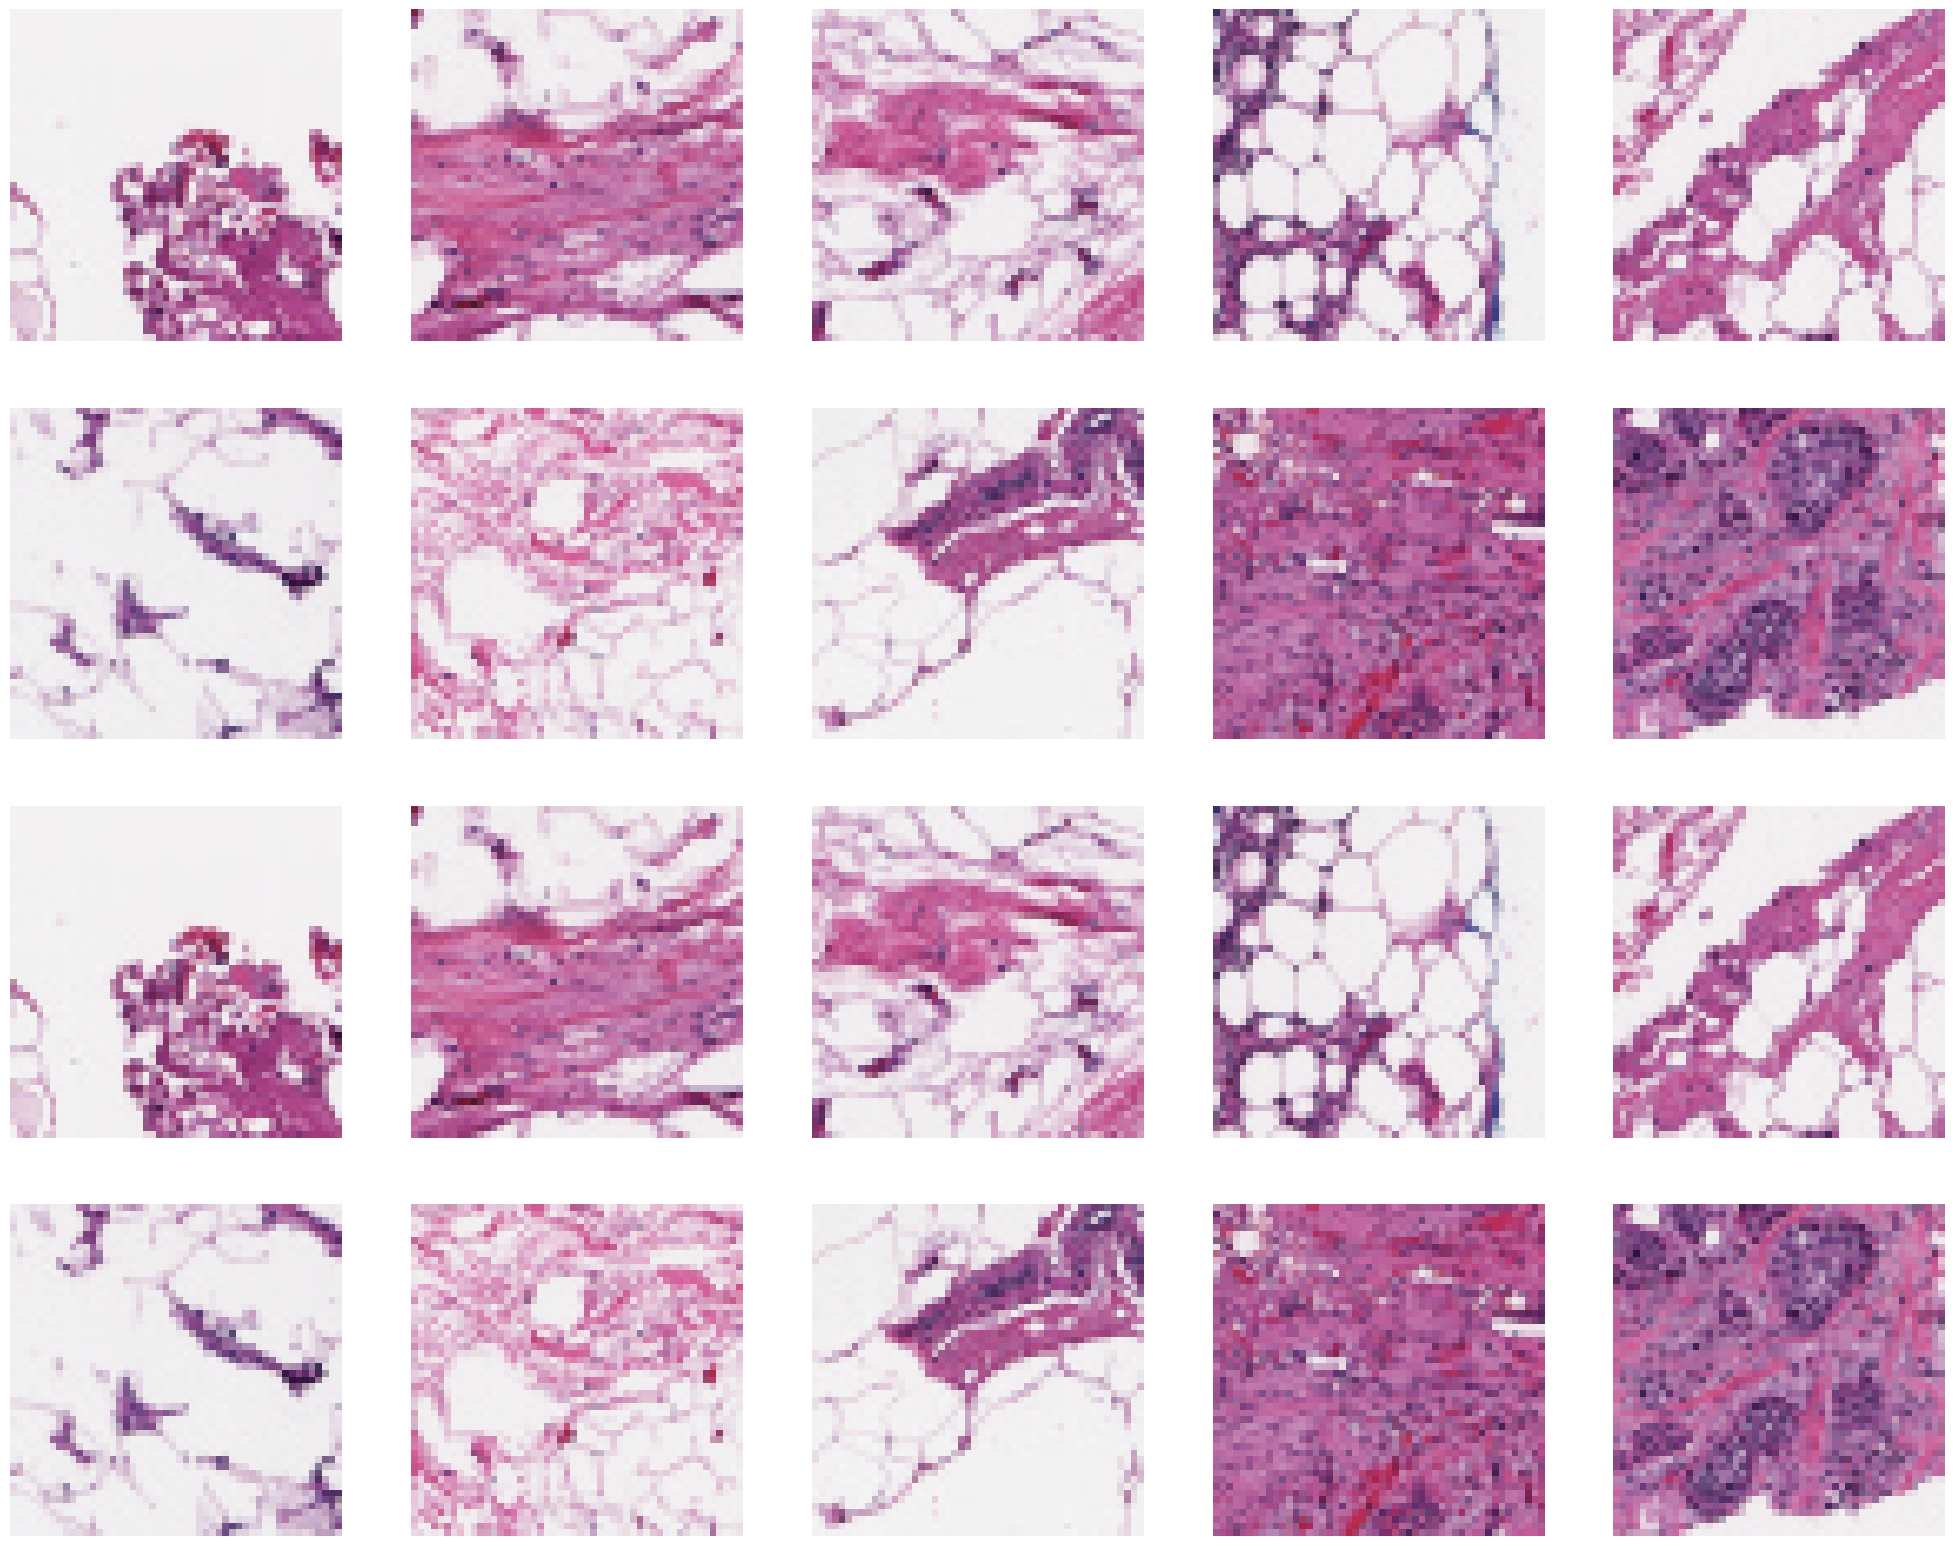

In [ ]:
# Set up matplotlib fig, and size it to fit 5x5 pics

fig = plt.gcf()
fig.set_size_inches(ncols*5, nrows*5)

pic_index+=10

next_benign_pix = [os.path.join(train_benign_dir, fname) 
                for fname in train_benign_fnames[ pic_index-10:pic_index] 
               ]

next_malignant_pix = [os.path.join(train_malignant_dir, fname) 
                for fname in train_malignant_fnames[ pic_index-10:pic_index]
               ]

for i, img_path in enumerate(next_benign_pix+next_benign_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255.)
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    #color_mode='grayscale',
                                                    target_size=(64 , 64)
                                                    )     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                        class_mode  = 'binary',
                                                          target_size = (64 , 64))



Found 4014 images belonging to 2 classes.
Found 720 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.metrics import TruePositives, FalsePositives, TrueNegatives, FalseNegatives, BinaryAccuracy, Precision, Recall, AUC
from tensorflow.keras.metrics import SpecificityAtSensitivity
METRICS = [
      TruePositives(name='tp'),
      FalsePositives(name='fp'),
      TrueNegatives(name='tn'),
      FalseNegatives(name='fn'), 
      BinaryAccuracy(name='accuracy'),
      Precision(name='precision'),
      Recall(name='recall'),
      AUC(name='auc'),
      SpecificityAtSensitivity(sensitivity=0.8, name='sensitivity'),
]

In [ ]:
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.optimizers import RMSprop, Adam



model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (5, 5), activation='relu', input_shape=(64, 64, 3), 
                           kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', 
                           kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', 
                           kernel_regularizer=regularizers.l2(0.001)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', 
                           kernel_regularizer=regularizers.l2(0.001)), 
    tf.keras.layers.AveragePooling2D(2,2),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(512, activation='relu', 
                          kernel_regularizer=regularizers.l2(0.001)), 
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.92, beta_2=0.999),
              loss='binary_crossentropy',
              metrics=METRICS)

#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_acc', patience=5, restore_best_weights = True)

history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=50,
                    epochs=100,
                    validation_steps=12,
                    callbacks=[early_stop])

Epoch 1/100
50/50 [==============================] - ETA: 0s - loss: 0.9912 - tp: 236.0000 - fp: 121.0000 - tn: 379.0000 - fn: 264.0000 - accuracy: 0.6150 - precision: 0.6611 - recall: 0.4720 - auc: 0.6813 - sensitivity: 0.4400

50/50 [==============================] - 439s 9s/step - loss: 0.9912 - tp: 236.0000 - fp: 121.0000 - tn: 379.0000 - fn: 264.0000 - accuracy: 0.6150 - precision: 0.6611 - recall: 0.4720 - auc: 0.6813 - sensitivity: 0.4400 - val_loss: 0.6047 - val_tp: 110.0000 - val_fp: 43.0000 - val_tn: 84.0000 - val_fn: 3.0000 - val_accuracy: 0.8083 - val_precision: 0.7190 - val_recall: 0.9735 - val_auc: 0.9293 - val_sensitivity: 0.8661
Epoch 2/100
50/50 [==============================] - ETA: 0s - loss: 0.6339 - tp: 395.0000 - fp: 132.0000 - tn: 363.0000 - fn: 110.0000 - accuracy: 0.7580 - precision: 0.7495 - recall: 0.7822 - auc: 0.8009 - sensitivity: 0.7192

50/50 [==============================] - 341s 7s/step - loss: 0.6339 - tp: 395.0000 - fp: 132.0000 - tn: 363.0000 - fn: 110.0000 - accuracy: 0.7580 - precision: 0.7495 - recall: 0.7822 - auc: 0.8009 - sensitivity: 0.7192 - val_loss: 0.4624 - val_tp: 111.0000 - val_fp: 21.0000 - val_tn: 104.0000 - val_fn: 4.0000 - val_accuracy: 0.8958 - val_precision: 0.8409 - val_recall: 0.9652 - val_auc: 0.9786 - val_sensitivity: 0.9680
Epoch 3/100
50/50 [==============================] - ETA: 0s - loss: 0.5818 - tp: 388.0000 - fp: 122.0000 - tn: 379.0000 - fn: 111.0000 - accuracy: 0.7670 - precision: 0.7608 - recall: 0.7776 - auc: 0.8206 - sensitivity: 0.7405

50/50 [==============================] - 225s 5s/step - loss: 0.5818 - tp: 388.0000 - fp: 122.0000 - tn: 379.0000 - fn: 111.0000 - accuracy: 0.7670 - precision: 0.7608 - recall: 0.7776 - auc: 0.8206 - sensitivity: 0.7405 - val_loss: 0.5101 - val_tp: 108.0000 - val_fp: 41.0000 - val_tn: 84.0000 - val_fn: 7.0000 - val_accuracy: 0.8000 - val_precision: 0.7248 - val_recall: 0.9391 - val_auc: 0.9329 - val_sensitivity: 0.8800
Epoch 4/100
50/50 [==============================] - ETA: 0s - loss: 0.5690 - tp: 388.0000 - fp: 129.0000 - tn: 354.0000 - fn: 123.0000 - accuracy: 0.7465 - precision: 0.7505 - recall: 0.7593 - auc: 0.8195 - sensitivity: 0.7039

50/50 [==============================] - 162s 3s/step - loss: 0.5690 - tp: 388.0000 - fp: 129.0000 - tn: 354.0000 - fn: 123.0000 - accuracy: 0.7465 - precision: 0.7505 - recall: 0.7593 - auc: 0.8195 - sensitivity: 0.7039 - val_loss: 0.7712 - val_tp: 107.0000 - val_fp: 102.0000 - val_tn: 31.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.5750 - val_precision: 0.5120 - val_recall: 1.0000 - val_auc: 0.9480 - val_sensitivity: 0.9248
Epoch 5/100
50/50 [==============================] - ETA: 0s - loss: 0.5549 - tp: 412.0000 - fp: 111.0000 - tn: 363.0000 - fn: 108.0000 - accuracy: 0.7797 - precision: 0.7878 - recall: 0.7923 - auc: 0.8269 - sensitivity: 0.7553

50/50 [==============================] - 123s 2s/step - loss: 0.5549 - tp: 412.0000 - fp: 111.0000 - tn: 363.0000 - fn: 108.0000 - accuracy: 0.7797 - precision: 0.7878 - recall: 0.7923 - auc: 0.8269 - sensitivity: 0.7553 - val_loss: 0.3833 - val_tp: 112.0000 - val_fp: 27.0000 - val_tn: 94.0000 - val_fn: 7.0000 - val_accuracy: 0.8583 - val_precision: 0.8058 - val_recall: 0.9412 - val_auc: 0.9625 - val_sensitivity: 0.9587
Epoch 6/100
50/50 [==============================] - ETA: 0s - loss: 0.5513 - tp: 383.0000 - fp: 118.0000 - tn: 377.0000 - fn: 122.0000 - accuracy: 0.7600 - precision: 0.7645 - recall: 0.7584 - auc: 0.8233 - sensitivity: 0.7273

50/50 [==============================] - 86s 2s/step - loss: 0.5513 - tp: 383.0000 - fp: 118.0000 - tn: 377.0000 - fn: 122.0000 - accuracy: 0.7600 - precision: 0.7645 - recall: 0.7584 - auc: 0.8233 - sensitivity: 0.7273 - val_loss: 0.3606 - val_tp: 117.0000 - val_fp: 24.0000 - val_tn: 96.0000 - val_fn: 3.0000 - val_accuracy: 0.8875 - val_precision: 0.8298 - val_recall: 0.9750 - val_auc: 0.9693 - val_sensitivity: 0.9667
Epoch 7/100
50/50 [==============================] - ETA: 0s - loss: 0.4997 - tp: 411.0000 - fp: 106.0000 - tn: 391.0000 - fn: 86.0000 - accuracy: 0.8068 - precision: 0.7950 - recall: 0.8270 - auc: 0.8552 - sensitivity: 0.7907

50/50 [==============================] - 67s 1s/step - loss: 0.4997 - tp: 411.0000 - fp: 106.0000 - tn: 391.0000 - fn: 86.0000 - accuracy: 0.8068 - precision: 0.7950 - recall: 0.8270 - auc: 0.8552 - sensitivity: 0.7907 - val_loss: 0.4475 - val_tp: 116.0000 - val_fp: 24.0000 - val_tn: 88.0000 - val_fn: 12.0000 - val_accuracy: 0.8500 - val_precision: 0.8286 - val_recall: 0.9062 - val_auc: 0.9407 - val_sensitivity: 0.9375
Epoch 8/100
50/50 [==============================] - ETA: 0s - loss: 0.5013 - tp: 420.0000 - fp: 117.0000 - tn: 372.0000 - fn: 85.0000 - accuracy: 0.7968 - precision: 0.7821 - recall: 0.8317 - auc: 0.8502 - sensitivity: 0.7832

50/50 [==============================] - 54s 1s/step - loss: 0.5013 - tp: 420.0000 - fp: 117.0000 - tn: 372.0000 - fn: 85.0000 - accuracy: 0.7968 - precision: 0.7821 - recall: 0.8317 - auc: 0.8502 - sensitivity: 0.7832 - val_loss: 0.3644 - val_tp: 113.0000 - val_fp: 20.0000 - val_tn: 101.0000 - val_fn: 6.0000 - val_accuracy: 0.8917 - val_precision: 0.8496 - val_recall: 0.9496 - val_auc: 0.9648 - val_sensitivity: 0.9669
Epoch 9/100
50/50 [==============================] - ETA: 0s - loss: 0.4919 - tp: 433.0000 - fp: 120.0000 - tn: 374.0000 - fn: 73.0000 - accuracy: 0.8070 - precision: 0.7830 - recall: 0.8557 - auc: 0.8550 - sensitivity: 0.8016

50/50 [==============================] - 37s 738ms/step - loss: 0.4919 - tp: 433.0000 - fp: 120.0000 - tn: 374.0000 - fn: 73.0000 - accuracy: 0.8070 - precision: 0.7830 - recall: 0.8557 - auc: 0.8550 - sensitivity: 0.8016 - val_loss: 0.3705 - val_tp: 118.0000 - val_fp: 21.0000 - val_tn: 90.0000 - val_fn: 11.0000 - val_accuracy: 0.8667 - val_precision: 0.8489 - val_recall: 0.9147 - val_auc: 0.9574 - val_sensitivity: 0.9550
Epoch 10/100
50/50 [==============================] - ETA: 0s - loss: 0.4780 - tp: 421.0000 - fp: 109.0000 - tn: 387.0000 - fn: 83.0000 - accuracy: 0.8080 - precision: 0.7943 - recall: 0.8353 - auc: 0.8651 - sensitivity: 0.8226

50/50 [==============================] - 33s 661ms/step - loss: 0.4780 - tp: 421.0000 - fp: 109.0000 - tn: 387.0000 - fn: 83.0000 - accuracy: 0.8080 - precision: 0.7943 - recall: 0.8353 - auc: 0.8651 - sensitivity: 0.8226 - val_loss: 0.3596 - val_tp: 111.0000 - val_fp: 23.0000 - val_tn: 94.0000 - val_fn: 12.0000 - val_accuracy: 0.8542 - val_precision: 0.8284 - val_recall: 0.9024 - val_auc: 0.9540 - val_sensitivity: 0.9658
Epoch 11/100
50/50 [==============================] - ETA: 0s - loss: 0.5277 - tp: 379.0000 - fp: 114.0000 - tn: 391.0000 - fn: 116.0000 - accuracy: 0.7700 - precision: 0.7688 - recall: 0.7657 - auc: 0.8325 - sensitivity: 0.7386

50/50 [==============================] - 21s 424ms/step - loss: 0.5277 - tp: 379.0000 - fp: 114.0000 - tn: 391.0000 - fn: 116.0000 - accuracy: 0.7700 - precision: 0.7688 - recall: 0.7657 - auc: 0.8325 - sensitivity: 0.7386 - val_loss: 0.2993 - val_tp: 110.0000 - val_fp: 11.0000 - val_tn: 108.0000 - val_fn: 11.0000 - val_accuracy: 0.9083 - val_precision: 0.9091 - val_recall: 0.9091 - val_auc: 0.9757 - val_sensitivity: 0.9748
Epoch 12/100
50/50 [==============================] - ETA: 0s - loss: 0.4796 - tp: 396.0000 - fp: 107.0000 - tn: 405.0000 - fn: 92.0000 - accuracy: 0.8010 - precision: 0.7873 - recall: 0.8115 - auc: 0.8693 - sensitivity: 0.7988

50/50 [==============================] - 15s 295ms/step - loss: 0.4796 - tp: 396.0000 - fp: 107.0000 - tn: 405.0000 - fn: 92.0000 - accuracy: 0.8010 - precision: 0.7873 - recall: 0.8115 - auc: 0.8693 - sensitivity: 0.7988 - val_loss: 0.3750 - val_tp: 120.0000 - val_fp: 24.0000 - val_tn: 93.0000 - val_fn: 3.0000 - val_accuracy: 0.8875 - val_precision: 0.8333 - val_recall: 0.9756 - val_auc: 0.9699 - val_sensitivity: 0.9402
Epoch 13/100
50/50 [==============================] - ETA: 0s - loss: 0.5165 - tp: 413.0000 - fp: 107.0000 - tn: 368.0000 - fn: 106.0000 - accuracy: 0.7857 - precision: 0.7942 - recall: 0.7958 - auc: 0.8330 - sensitivity: 0.7663

50/50 [==============================] - 16s 317ms/step - loss: 0.5165 - tp: 413.0000 - fp: 107.0000 - tn: 368.0000 - fn: 106.0000 - accuracy: 0.7857 - precision: 0.7942 - recall: 0.7958 - auc: 0.8330 - sensitivity: 0.7663 - val_loss: 0.4098 - val_tp: 108.0000 - val_fp: 27.0000 - val_tn: 94.0000 - val_fn: 11.0000 - val_accuracy: 0.8417 - val_precision: 0.8000 - val_recall: 0.9076 - val_auc: 0.9423 - val_sensitivity: 0.9421
Epoch 14/100
50/50 [==============================] - ETA: 0s - loss: 0.4979 - tp: 387.0000 - fp: 111.0000 - tn: 411.0000 - fn: 91.0000 - accuracy: 0.7980 - precision: 0.7771 - recall: 0.8096 - auc: 0.8497 - sensitivity: 0.7950

50/50 [==============================] - 13s 265ms/step - loss: 0.4979 - tp: 387.0000 - fp: 111.0000 - tn: 411.0000 - fn: 91.0000 - accuracy: 0.7980 - precision: 0.7771 - recall: 0.8096 - auc: 0.8497 - sensitivity: 0.7950 - val_loss: 0.4531 - val_tp: 99.0000 - val_fp: 26.0000 - val_tn: 108.0000 - val_fn: 7.0000 - val_accuracy: 0.8625 - val_precision: 0.7920 - val_recall: 0.9340 - val_auc: 0.9660 - val_sensitivity: 0.9776
Epoch 15/100
50/50 [==============================] - ETA: 0s - loss: 0.4836 - tp: 381.0000 - fp: 104.0000 - tn: 423.0000 - fn: 86.0000 - accuracy: 0.8089 - precision: 0.7856 - recall: 0.8158 - auc: 0.8556 - sensitivity: 0.8083

50/50 [==============================] - 12s 235ms/step - loss: 0.4836 - tp: 381.0000 - fp: 104.0000 - tn: 423.0000 - fn: 86.0000 - accuracy: 0.8089 - precision: 0.7856 - recall: 0.8158 - auc: 0.8556 - sensitivity: 0.8083 - val_loss: 0.4225 - val_tp: 118.0000 - val_fp: 30.0000 - val_tn: 86.0000 - val_fn: 6.0000 - val_accuracy: 0.8500 - val_precision: 0.7973 - val_recall: 0.9516 - val_auc: 0.9648 - val_sensitivity: 0.9828
Epoch 16/100
50/50 [==============================] - ETA: 0s - loss: 0.5378 - tp: 406.0000 - fp: 113.0000 - tn: 362.0000 - fn: 119.0000 - accuracy: 0.7680 - precision: 0.7823 - recall: 0.7733 - auc: 0.8204 - sensitivity: 0.7095

50/50 [==============================] - 10s 204ms/step - loss: 0.5378 - tp: 406.0000 - fp: 113.0000 - tn: 362.0000 - fn: 119.0000 - accuracy: 0.7680 - precision: 0.7823 - recall: 0.7733 - auc: 0.8204 - sensitivity: 0.7095 - val_loss: 0.3909 - val_tp: 118.0000 - val_fp: 18.0000 - val_tn: 93.0000 - val_fn: 11.0000 - val_accuracy: 0.8792 - val_precision: 0.8676 - val_recall: 0.9147 - val_auc: 0.9600 - val_sensitivity: 0.9820
Epoch 17/100
50/50 [==============================] - ETA: 0s - loss: 0.4848 - tp: 362.0000 - fp: 83.0000 - tn: 434.0000 - fn: 121.0000 - accuracy: 0.7960 - precision: 0.8135 - recall: 0.7495 - auc: 0.8625 - sensitivity: 0.7872

50/50 [==============================] - 9s 167ms/step - loss: 0.4848 - tp: 362.0000 - fp: 83.0000 - tn: 434.0000 - fn: 121.0000 - accuracy: 0.7960 - precision: 0.8135 - recall: 0.7495 - auc: 0.8625 - sensitivity: 0.7872 - val_loss: 0.3442 - val_tp: 109.0000 - val_fp: 22.0000 - val_tn: 102.0000 - val_fn: 7.0000 - val_accuracy: 0.8792 - val_precision: 0.8321 - val_recall: 0.9397 - val_auc: 0.9728 - val_sensitivity: 0.9919
Epoch 18/100
50/50 [==============================] - ETA: 0s - loss: 0.4838 - tp: 397.0000 - fp: 107.0000 - tn: 408.0000 - fn: 88.0000 - accuracy: 0.8050 - precision: 0.7877 - recall: 0.8186 - auc: 0.8611 - sensitivity: 0.8058

50/50 [==============================] - 10s 203ms/step - loss: 0.4838 - tp: 397.0000 - fp: 107.0000 - tn: 408.0000 - fn: 88.0000 - accuracy: 0.8050 - precision: 0.7877 - recall: 0.8186 - auc: 0.8611 - sensitivity: 0.8058 - val_loss: 0.3889 - val_tp: 129.0000 - val_fp: 30.0000 - val_tn: 80.0000 - val_fn: 1.0000 - val_accuracy: 0.8708 - val_precision: 0.8113 - val_recall: 0.9923 - val_auc: 0.9688 - val_sensitivity: 0.9455
Epoch 19/100
50/50 [==============================] - ETA: 0s - loss: 0.5146 - tp: 384.0000 - fp: 107.0000 - tn: 398.0000 - fn: 111.0000 - accuracy: 0.7820 - precision: 0.7821 - recall: 0.7758 - auc: 0.8377 - sensitivity: 0.7683

50/50 [==============================] - 10s 193ms/step - loss: 0.5146 - tp: 384.0000 - fp: 107.0000 - tn: 398.0000 - fn: 111.0000 - accuracy: 0.7820 - precision: 0.7821 - recall: 0.7758 - auc: 0.8377 - sensitivity: 0.7683 - val_loss: 0.4499 - val_tp: 121.0000 - val_fp: 34.0000 - val_tn: 81.0000 - val_fn: 4.0000 - val_accuracy: 0.8417 - val_precision: 0.7806 - val_recall: 0.9680 - val_auc: 0.9576 - val_sensitivity: 0.9478
Epoch 20/100
50/50 [==============================] - ETA: 0s - loss: 0.4965 - tp: 391.0000 - fp: 102.0000 - tn: 394.0000 - fn: 107.0000 - accuracy: 0.7897 - precision: 0.7931 - recall: 0.7851 - auc: 0.8526 - sensitivity: 0.7742

50/50 [==============================] - 8s 167ms/step - loss: 0.4965 - tp: 391.0000 - fp: 102.0000 - tn: 394.0000 - fn: 107.0000 - accuracy: 0.7897 - precision: 0.7931 - recall: 0.7851 - auc: 0.8526 - sensitivity: 0.7742 - val_loss: 0.2951 - val_tp: 107.0000 - val_fp: 8.0000 - val_tn: 107.0000 - val_fn: 18.0000 - val_accuracy: 0.8917 - val_precision: 0.9304 - val_recall: 0.8560 - val_auc: 0.9712 - val_sensitivity: 0.9826
Epoch 21/100
50/50 [==============================] - ETA: 0s - loss: 0.4930 - tp: 378.0000 - fp: 96.0000 - tn: 400.0000 - fn: 120.0000 - accuracy: 0.7827 - precision: 0.7975 - recall: 0.7590 - auc: 0.8537 - sensitivity: 0.7843

50/50 [==============================] - 10s 191ms/step - loss: 0.4930 - tp: 378.0000 - fp: 96.0000 - tn: 400.0000 - fn: 120.0000 - accuracy: 0.7827 - precision: 0.7975 - recall: 0.7590 - auc: 0.8537 - sensitivity: 0.7843 - val_loss: 0.3923 - val_tp: 112.0000 - val_fp: 32.0000 - val_tn: 93.0000 - val_fn: 3.0000 - val_accuracy: 0.8542 - val_precision: 0.7778 - val_recall: 0.9739 - val_auc: 0.9746 - val_sensitivity: 0.9760
Epoch 22/100
50/50 [==============================] - ETA: 0s - loss: 0.5088 - tp: 398.0000 - fp: 126.0000 - tn: 375.0000 - fn: 95.0000 - accuracy: 0.7777 - precision: 0.7595 - recall: 0.8073 - auc: 0.8464 - sensitivity: 0.7545

50/50 [==============================] - 9s 190ms/step - loss: 0.5088 - tp: 398.0000 - fp: 126.0000 - tn: 375.0000 - fn: 95.0000 - accuracy: 0.7777 - precision: 0.7595 - recall: 0.8073 - auc: 0.8464 - sensitivity: 0.7545 - val_loss: 0.3679 - val_tp: 114.0000 - val_fp: 26.0000 - val_tn: 94.0000 - val_fn: 6.0000 - val_accuracy: 0.8667 - val_precision: 0.8143 - val_recall: 0.9500 - val_auc: 0.9712 - val_sensitivity: 0.9917
Epoch 23/100
50/50 [==============================] - ETA: 0s - loss: 0.5196 - tp: 395.0000 - fp: 115.0000 - tn: 375.0000 - fn: 115.0000 - accuracy: 0.7700 - precision: 0.7745 - recall: 0.7745 - auc: 0.8341 - sensitivity: 0.7469

50/50 [==============================] - 8s 160ms/step - loss: 0.5196 - tp: 395.0000 - fp: 115.0000 - tn: 375.0000 - fn: 115.0000 - accuracy: 0.7700 - precision: 0.7745 - recall: 0.7745 - auc: 0.8341 - sensitivity: 0.7469 - val_loss: 0.4811 - val_tp: 114.0000 - val_fp: 38.0000 - val_tn: 83.0000 - val_fn: 5.0000 - val_accuracy: 0.8208 - val_precision: 0.7500 - val_recall: 0.9580 - val_auc: 0.9530 - val_sensitivity: 0.9587
Epoch 24/100
50/50 [==============================] - ETA: 0s - loss: 0.4930 - tp: 399.0000 - fp: 109.0000 - tn: 385.0000 - fn: 107.0000 - accuracy: 0.7840 - precision: 0.7854 - recall: 0.7885 - auc: 0.8587 - sensitivity: 0.7733

50/50 [==============================] - 7s 146ms/step - loss: 0.4930 - tp: 399.0000 - fp: 109.0000 - tn: 385.0000 - fn: 107.0000 - accuracy: 0.7840 - precision: 0.7854 - recall: 0.7885 - auc: 0.8587 - sensitivity: 0.7733 - val_loss: 0.3623 - val_tp: 112.0000 - val_fp: 26.0000 - val_tn: 96.0000 - val_fn: 6.0000 - val_accuracy: 0.8667 - val_precision: 0.8116 - val_recall: 0.9492 - val_auc: 0.9668 - val_sensitivity: 0.9590
Epoch 25/100
50/50 [==============================] - ETA: 0s - loss: 0.4558 - tp: 388.0000 - fp: 103.0000 - tn: 416.0000 - fn: 93.0000 - accuracy: 0.8040 - precision: 0.7902 - recall: 0.8067 - auc: 0.8788 - sensitivity: 0.8131

50/50 [==============================] - 8s 170ms/step - loss: 0.4558 - tp: 388.0000 - fp: 103.0000 - tn: 416.0000 - fn: 93.0000 - accuracy: 0.8040 - precision: 0.7902 - recall: 0.8067 - auc: 0.8788 - sensitivity: 0.8131 - val_loss: 0.3546 - val_tp: 108.0000 - val_fp: 25.0000 - val_tn: 98.0000 - val_fn: 9.0000 - val_accuracy: 0.8583 - val_precision: 0.8120 - val_recall: 0.9231 - val_auc: 0.9501 - val_sensitivity: 0.9431
Epoch 26/100
50/50 [==============================] - ETA: 0s - loss: 0.5265 - tp: 409.0000 - fp: 94.0000 - tn: 392.0000 - fn: 105.0000 - accuracy: 0.8010 - precision: 0.8131 - recall: 0.7957 - auc: 0.8415 - sensitivity: 0.8045

50/50 [==============================] - 7s 137ms/step - loss: 0.5265 - tp: 409.0000 - fp: 94.0000 - tn: 392.0000 - fn: 105.0000 - accuracy: 0.8010 - precision: 0.8131 - recall: 0.7957 - auc: 0.8415 - sensitivity: 0.8045 - val_loss: 0.4770 - val_tp: 110.0000 - val_fp: 25.0000 - val_tn: 95.0000 - val_fn: 10.0000 - val_accuracy: 0.8542 - val_precision: 0.8148 - val_recall: 0.9167 - val_auc: 0.9533 - val_sensitivity: 0.9417
Epoch 27/100
50/50 [==============================] - ETA: 0s - loss: 0.5186 - tp: 396.0000 - fp: 116.0000 - tn: 379.0000 - fn: 109.0000 - accuracy: 0.7750 - precision: 0.7734 - recall: 0.7842 - auc: 0.8340 - sensitivity: 0.7475

50/50 [==============================] - 7s 130ms/step - loss: 0.5186 - tp: 396.0000 - fp: 116.0000 - tn: 379.0000 - fn: 109.0000 - accuracy: 0.7750 - precision: 0.7734 - recall: 0.7842 - auc: 0.8340 - sensitivity: 0.7475 - val_loss: 0.4424 - val_tp: 109.0000 - val_fp: 36.0000 - val_tn: 91.0000 - val_fn: 4.0000 - val_accuracy: 0.8333 - val_precision: 0.7517 - val_recall: 0.9646 - val_auc: 0.9481 - val_sensitivity: 0.9213
Epoch 28/100
50/50 [==============================] - ETA: 0s - loss: 0.5106 - tp: 400.0000 - fp: 125.0000 - tn: 380.0000 - fn: 95.0000 - accuracy: 0.7800 - precision: 0.7619 - recall: 0.8081 - auc: 0.8378 - sensitivity: 0.7545

50/50 [==============================] - 9s 182ms/step - loss: 0.5106 - tp: 400.0000 - fp: 125.0000 - tn: 380.0000 - fn: 95.0000 - accuracy: 0.7800 - precision: 0.7619 - recall: 0.8081 - auc: 0.8378 - sensitivity: 0.7545 - val_loss: 0.3958 - val_tp: 108.0000 - val_fp: 30.0000 - val_tn: 95.0000 - val_fn: 7.0000 - val_accuracy: 0.8458 - val_precision: 0.7826 - val_recall: 0.9391 - val_auc: 0.9250 - val_sensitivity: 0.9040
Epoch 29/100
50/50 [==============================] - ETA: 0s - loss: 0.4802 - tp: 407.0000 - fp: 97.0000 - tn: 392.0000 - fn: 104.0000 - accuracy: 0.7990 - precision: 0.8075 - recall: 0.7965 - auc: 0.8632 - sensitivity: 0.7914

50/50 [==============================] - 6s 126ms/step - loss: 0.4802 - tp: 407.0000 - fp: 97.0000 - tn: 392.0000 - fn: 104.0000 - accuracy: 0.7990 - precision: 0.8075 - recall: 0.7965 - auc: 0.8632 - sensitivity: 0.7914 - val_loss: 0.3816 - val_tp: 125.0000 - val_fp: 27.0000 - val_tn: 82.0000 - val_fn: 6.0000 - val_accuracy: 0.8625 - val_precision: 0.8224 - val_recall: 0.9542 - val_auc: 0.9634 - val_sensitivity: 0.9450
Epoch 30/100
50/50 [==============================] - ETA: 0s - loss: 0.5212 - tp: 396.0000 - fp: 122.0000 - tn: 369.0000 - fn: 107.0000 - accuracy: 0.7696 - precision: 0.7645 - recall: 0.7873 - auc: 0.8318 - sensitivity: 0.7352

50/50 [==============================] - 7s 139ms/step - loss: 0.5212 - tp: 396.0000 - fp: 122.0000 - tn: 369.0000 - fn: 107.0000 - accuracy: 0.7696 - precision: 0.7645 - recall: 0.7873 - auc: 0.8318 - sensitivity: 0.7352 - val_loss: 0.3657 - val_tp: 114.0000 - val_fp: 18.0000 - val_tn: 99.0000 - val_fn: 9.0000 - val_accuracy: 0.8875 - val_precision: 0.8636 - val_recall: 0.9268 - val_auc: 0.9516 - val_sensitivity: 0.9145
Epoch 31/100
50/50 [==============================] - ETA: 0s - loss: 0.4652 - tp: 399.0000 - fp: 102.0000 - tn: 405.0000 - fn: 94.0000 - accuracy: 0.8040 - precision: 0.7964 - recall: 0.8093 - auc: 0.8741 - sensitivity: 0.8107

50/50 [==============================] - 9s 171ms/step - loss: 0.4652 - tp: 399.0000 - fp: 102.0000 - tn: 405.0000 - fn: 94.0000 - accuracy: 0.8040 - precision: 0.7964 - recall: 0.8093 - auc: 0.8741 - sensitivity: 0.8107 - val_loss: 0.3092 - val_tp: 116.0000 - val_fp: 14.0000 - val_tn: 100.0000 - val_fn: 10.0000 - val_accuracy: 0.9000 - val_precision: 0.8923 - val_recall: 0.9206 - val_auc: 0.9700 - val_sensitivity: 0.9737
Epoch 32/100
50/50 [==============================] - ETA: 0s - loss: 0.4499 - tp: 394.0000 - fp: 104.0000 - tn: 418.0000 - fn: 84.0000 - accuracy: 0.8120 - precision: 0.7912 - recall: 0.8243 - auc: 0.8854 - sensitivity: 0.8257

50/50 [==============================] - 7s 139ms/step - loss: 0.4499 - tp: 394.0000 - fp: 104.0000 - tn: 418.0000 - fn: 84.0000 - accuracy: 0.8120 - precision: 0.7912 - recall: 0.8243 - auc: 0.8854 - sensitivity: 0.8257 - val_loss: 0.2962 - val_tp: 104.0000 - val_fp: 16.0000 - val_tn: 112.0000 - val_fn: 8.0000 - val_accuracy: 0.9000 - val_precision: 0.8667 - val_recall: 0.9286 - val_auc: 0.9771 - val_sensitivity: 0.9844
Epoch 33/100
50/50 [==============================] - ETA: 0s - loss: 0.4707 - tp: 414.0000 - fp: 104.0000 - tn: 394.0000 - fn: 88.0000 - accuracy: 0.8080 - precision: 0.7992 - recall: 0.8247 - auc: 0.8715 - sensitivity: 0.8052

50/50 [==============================] - 8s 153ms/step - loss: 0.4707 - tp: 414.0000 - fp: 104.0000 - tn: 394.0000 - fn: 88.0000 - accuracy: 0.8080 - precision: 0.7992 - recall: 0.8247 - auc: 0.8715 - sensitivity: 0.8052 - val_loss: 0.3723 - val_tp: 116.0000 - val_fp: 25.0000 - val_tn: 90.0000 - val_fn: 9.0000 - val_accuracy: 0.8583 - val_precision: 0.8227 - val_recall: 0.9280 - val_auc: 0.9579 - val_sensitivity: 0.9826
Epoch 34/100
50/50 [==============================] - ETA: 0s - loss: 0.4454 - tp: 425.0000 - fp: 90.0000 - tn: 404.0000 - fn: 81.0000 - accuracy: 0.8290 - precision: 0.8252 - recall: 0.8399 - auc: 0.8806 - sensitivity: 0.8664

50/50 [==============================] - 8s 160ms/step - loss: 0.4454 - tp: 425.0000 - fp: 90.0000 - tn: 404.0000 - fn: 81.0000 - accuracy: 0.8290 - precision: 0.8252 - recall: 0.8399 - auc: 0.8806 - sensitivity: 0.8664 - val_loss: 0.4548 - val_tp: 115.0000 - val_fp: 39.0000 - val_tn: 84.0000 - val_fn: 2.0000 - val_accuracy: 0.8292 - val_precision: 0.7468 - val_recall: 0.9829 - val_auc: 0.9574 - val_sensitivity: 0.9512
Epoch 35/100
50/50 [==============================] - ETA: 0s - loss: 0.4399 - tp: 381.0000 - fp: 82.0000 - tn: 449.0000 - fn: 82.0000 - accuracy: 0.8350 - precision: 0.8229 - recall: 0.8229 - auc: 0.8820 - sensitivity: 0.8682

50/50 [==============================] - 7s 143ms/step - loss: 0.4399 - tp: 381.0000 - fp: 82.0000 - tn: 449.0000 - fn: 82.0000 - accuracy: 0.8350 - precision: 0.8229 - recall: 0.8229 - auc: 0.8820 - sensitivity: 0.8682 - val_loss: 0.4025 - val_tp: 116.0000 - val_fp: 30.0000 - val_tn: 88.0000 - val_fn: 6.0000 - val_accuracy: 0.8500 - val_precision: 0.7945 - val_recall: 0.9508 - val_auc: 0.9648 - val_sensitivity: 0.9492
Epoch 36/100
50/50 [==============================] - ETA: 0s - loss: 0.5310 - tp: 383.0000 - fp: 104.0000 - tn: 402.0000 - fn: 111.0000 - accuracy: 0.7850 - precision: 0.7864 - recall: 0.7753 - auc: 0.8273 - sensitivity: 0.7767

50/50 [==============================] - 9s 182ms/step - loss: 0.5310 - tp: 383.0000 - fp: 104.0000 - tn: 402.0000 - fn: 111.0000 - accuracy: 0.7850 - precision: 0.7864 - recall: 0.7753 - auc: 0.8273 - sensitivity: 0.7767 - val_loss: 0.4013 - val_tp: 113.0000 - val_fp: 27.0000 - val_tn: 94.0000 - val_fn: 6.0000 - val_accuracy: 0.8625 - val_precision: 0.8071 - val_recall: 0.9496 - val_auc: 0.9501 - val_sensitivity: 0.9091
Epoch 37/100
50/50 [==============================] - ETA: 0s - loss: 0.4491 - tp: 416.0000 - fp: 100.0000 - tn: 408.0000 - fn: 76.0000 - accuracy: 0.8240 - precision: 0.8062 - recall: 0.8455 - auc: 0.8806 - sensitivity: 0.8445

50/50 [==============================] - 7s 139ms/step - loss: 0.4491 - tp: 416.0000 - fp: 100.0000 - tn: 408.0000 - fn: 76.0000 - accuracy: 0.8240 - precision: 0.8062 - recall: 0.8455 - auc: 0.8806 - sensitivity: 0.8445 - val_loss: 0.3371 - val_tp: 111.0000 - val_fp: 20.0000 - val_tn: 99.0000 - val_fn: 10.0000 - val_accuracy: 0.8750 - val_precision: 0.8473 - val_recall: 0.9174 - val_auc: 0.9632 - val_sensitivity: 0.9664
Epoch 38/100
50/50 [==============================] - ETA: 0s - loss: 0.4404 - tp: 411.0000 - fp: 93.0000 - tn: 411.0000 - fn: 79.0000 - accuracy: 0.8270 - precision: 0.8155 - recall: 0.8388 - auc: 0.8833 - sensitivity: 0.8413

50/50 [==============================] - 6s 127ms/step - loss: 0.4404 - tp: 411.0000 - fp: 93.0000 - tn: 411.0000 - fn: 79.0000 - accuracy: 0.8270 - precision: 0.8155 - recall: 0.8388 - auc: 0.8833 - sensitivity: 0.8413 - val_loss: 0.3109 - val_tp: 117.0000 - val_fp: 11.0000 - val_tn: 101.0000 - val_fn: 11.0000 - val_accuracy: 0.9083 - val_precision: 0.9141 - val_recall: 0.9141 - val_auc: 0.9632 - val_sensitivity: 0.9464
Epoch 39/100
50/50 [==============================] - ETA: 0s - loss: 0.4509 - tp: 391.0000 - fp: 86.0000 - tn: 426.0000 - fn: 97.0000 - accuracy: 0.8170 - precision: 0.8197 - recall: 0.8012 - auc: 0.8776 - sensitivity: 0.8320

50/50 [==============================] - 7s 144ms/step - loss: 0.4509 - tp: 391.0000 - fp: 86.0000 - tn: 426.0000 - fn: 97.0000 - accuracy: 0.8170 - precision: 0.8197 - recall: 0.8012 - auc: 0.8776 - sensitivity: 0.8320 - val_loss: 0.2983 - val_tp: 118.0000 - val_fp: 16.0000 - val_tn: 98.0000 - val_fn: 8.0000 - val_accuracy: 0.9000 - val_precision: 0.8806 - val_recall: 0.9365 - val_auc: 0.9744 - val_sensitivity: 0.9912
Epoch 40/100
50/50 [==============================] - ETA: 0s - loss: 0.4517 - tp: 415.0000 - fp: 101.0000 - tn: 397.0000 - fn: 87.0000 - accuracy: 0.8120 - precision: 0.8043 - recall: 0.8267 - auc: 0.8744 - sensitivity: 0.8273

50/50 [==============================] - 7s 144ms/step - loss: 0.4517 - tp: 415.0000 - fp: 101.0000 - tn: 397.0000 - fn: 87.0000 - accuracy: 0.8120 - precision: 0.8043 - recall: 0.8267 - auc: 0.8744 - sensitivity: 0.8273 - val_loss: 0.3397 - val_tp: 133.0000 - val_fp: 23.0000 - val_tn: 81.0000 - val_fn: 3.0000 - val_accuracy: 0.8917 - val_precision: 0.8526 - val_recall: 0.9779 - val_auc: 0.9695 - val_sensitivity: 0.9712
Epoch 41/100
50/50 [==============================] - ETA: 0s - loss: 0.4370 - tp: 424.0000 - fp: 98.0000 - tn: 398.0000 - fn: 74.0000 - accuracy: 0.8270 - precision: 0.8123 - recall: 0.8514 - auc: 0.8888 - sensitivity: 0.8468

50/50 [==============================] - 6s 124ms/step - loss: 0.4370 - tp: 424.0000 - fp: 98.0000 - tn: 398.0000 - fn: 74.0000 - accuracy: 0.8270 - precision: 0.8123 - recall: 0.8514 - auc: 0.8888 - sensitivity: 0.8468 - val_loss: 0.3337 - val_tp: 108.0000 - val_fp: 24.0000 - val_tn: 102.0000 - val_fn: 6.0000 - val_accuracy: 0.8750 - val_precision: 0.8182 - val_recall: 0.9474 - val_auc: 0.9599 - val_sensitivity: 0.9286
Epoch 42/100
50/50 [==============================] - ETA: 0s - loss: 0.4256 - tp: 403.0000 - fp: 80.0000 - tn: 426.0000 - fn: 91.0000 - accuracy: 0.8290 - precision: 0.8344 - recall: 0.8158 - auc: 0.8942 - sensitivity: 0.8636

50/50 [==============================] - 9s 183ms/step - loss: 0.4256 - tp: 403.0000 - fp: 80.0000 - tn: 426.0000 - fn: 91.0000 - accuracy: 0.8290 - precision: 0.8344 - recall: 0.8158 - auc: 0.8942 - sensitivity: 0.8636 - val_loss: 0.3615 - val_tp: 125.0000 - val_fp: 19.0000 - val_tn: 95.0000 - val_fn: 1.0000 - val_accuracy: 0.9167 - val_precision: 0.8681 - val_recall: 0.9921 - val_auc: 0.9859 - val_sensitivity: 0.9737
Epoch 43/100
50/50 [==============================] - ETA: 0s - loss: 0.4593 - tp: 402.0000 - fp: 97.0000 - tn: 412.0000 - fn: 89.0000 - accuracy: 0.8140 - precision: 0.8056 - recall: 0.8187 - auc: 0.8728 - sensitivity: 0.8350

50/50 [==============================] - 6s 124ms/step - loss: 0.4593 - tp: 402.0000 - fp: 97.0000 - tn: 412.0000 - fn: 89.0000 - accuracy: 0.8140 - precision: 0.8056 - recall: 0.8187 - auc: 0.8728 - sensitivity: 0.8350 - val_loss: 0.3983 - val_tp: 111.0000 - val_fp: 31.0000 - val_tn: 92.0000 - val_fn: 6.0000 - val_accuracy: 0.8458 - val_precision: 0.7817 - val_recall: 0.9487 - val_auc: 0.9504 - val_sensitivity: 0.9350
Epoch 44/100
50/50 [==============================] - ETA: 0s - loss: 0.4611 - tp: 440.0000 - fp: 91.0000 - tn: 376.0000 - fn: 87.0000 - accuracy: 0.8209 - precision: 0.8286 - recall: 0.8349 - auc: 0.8732 - sensitivity: 0.8266

50/50 [==============================] - 7s 128ms/step - loss: 0.4611 - tp: 440.0000 - fp: 91.0000 - tn: 376.0000 - fn: 87.0000 - accuracy: 0.8209 - precision: 0.8286 - recall: 0.8349 - auc: 0.8732 - sensitivity: 0.8266 - val_loss: 0.3673 - val_tp: 125.0000 - val_fp: 26.0000 - val_tn: 79.0000 - val_fn: 10.0000 - val_accuracy: 0.8500 - val_precision: 0.8278 - val_recall: 0.9259 - val_auc: 0.9485 - val_sensitivity: 0.9524
Epoch 45/100
50/50 [==============================] - ETA: 0s - loss: 0.4864 - tp: 419.0000 - fp: 106.0000 - tn: 376.0000 - fn: 99.0000 - accuracy: 0.7950 - precision: 0.7981 - recall: 0.8089 - auc: 0.8532 - sensitivity: 0.7863

50/50 [==============================] - 8s 160ms/step - loss: 0.4864 - tp: 419.0000 - fp: 106.0000 - tn: 376.0000 - fn: 99.0000 - accuracy: 0.7950 - precision: 0.7981 - recall: 0.8089 - auc: 0.8532 - sensitivity: 0.7863 - val_loss: 0.3711 - val_tp: 104.0000 - val_fp: 23.0000 - val_tn: 104.0000 - val_fn: 9.0000 - val_accuracy: 0.8667 - val_precision: 0.8189 - val_recall: 0.9204 - val_auc: 0.9569 - val_sensitivity: 0.9606
Epoch 46/100
50/50 [==============================] - ETA: 0s - loss: 0.4518 - tp: 439.0000 - fp: 106.0000 - tn: 372.0000 - fn: 83.0000 - accuracy: 0.8110 - precision: 0.8055 - recall: 0.8410 - auc: 0.8826 - sensitivity: 0.8389

50/50 [==============================] - 6s 125ms/step - loss: 0.4518 - tp: 439.0000 - fp: 106.0000 - tn: 372.0000 - fn: 83.0000 - accuracy: 0.8110 - precision: 0.8055 - recall: 0.8410 - auc: 0.8826 - sensitivity: 0.8389 - val_loss: 0.4110 - val_tp: 118.0000 - val_fp: 29.0000 - val_tn: 93.0000 - val_fn: 0.0000e+00 - val_accuracy: 0.8792 - val_precision: 0.8027 - val_recall: 1.0000 - val_auc: 0.9725 - val_sensitivity: 0.9590
Epoch 47/100
50/50 [==============================] - ETA: 0s - loss: 0.4582 - tp: 434.0000 - fp: 86.0000 - tn: 392.0000 - fn: 88.0000 - accuracy: 0.8260 - precision: 0.8346 - recall: 0.8314 - auc: 0.8709 - sensitivity: 0.8515

50/50 [==============================] - 8s 167ms/step - loss: 0.4582 - tp: 434.0000 - fp: 86.0000 - tn: 392.0000 - fn: 88.0000 - accuracy: 0.8260 - precision: 0.8346 - recall: 0.8314 - auc: 0.8709 - sensitivity: 0.8515 - val_loss: 0.3984 - val_tp: 119.0000 - val_fp: 30.0000 - val_tn: 88.0000 - val_fn: 3.0000 - val_accuracy: 0.8625 - val_precision: 0.7987 - val_recall: 0.9754 - val_auc: 0.9698 - val_sensitivity: 0.9576
Epoch 48/100
50/50 [==============================] - ETA: 0s - loss: 0.4277 - tp: 400.0000 - fp: 84.0000 - tn: 428.0000 - fn: 82.0000 - accuracy: 0.8330 - precision: 0.8264 - recall: 0.8299 - auc: 0.8953 - sensitivity: 0.8535

50/50 [==============================] - 7s 137ms/step - loss: 0.4277 - tp: 400.0000 - fp: 84.0000 - tn: 428.0000 - fn: 82.0000 - accuracy: 0.8330 - precision: 0.8264 - recall: 0.8299 - auc: 0.8953 - sensitivity: 0.8535 - val_loss: 0.3518 - val_tp: 106.0000 - val_fp: 23.0000 - val_tn: 103.0000 - val_fn: 8.0000 - val_accuracy: 0.8708 - val_precision: 0.8217 - val_recall: 0.9298 - val_auc: 0.9530 - val_sensitivity: 0.9127
Epoch 49/100
50/50 [==============================] - ETA: 0s - loss: 0.4477 - tp: 414.0000 - fp: 99.0000 - tn: 401.0000 - fn: 86.0000 - accuracy: 0.8150 - precision: 0.8070 - recall: 0.8280 - auc: 0.8844 - sensitivity: 0.8380

50/50 [==============================] - 9s 173ms/step - loss: 0.4477 - tp: 414.0000 - fp: 99.0000 - tn: 401.0000 - fn: 86.0000 - accuracy: 0.8150 - precision: 0.8070 - recall: 0.8280 - auc: 0.8844 - sensitivity: 0.8380 - val_loss: 0.3889 - val_tp: 120.0000 - val_fp: 32.0000 - val_tn: 84.0000 - val_fn: 4.0000 - val_accuracy: 0.8500 - val_precision: 0.7895 - val_recall: 0.9677 - val_auc: 0.9626 - val_sensitivity: 0.9483
Epoch 50/100
50/50 [==============================] - ETA: 0s - loss: 0.4384 - tp: 404.0000 - fp: 84.0000 - tn: 422.0000 - fn: 90.0000 - accuracy: 0.8260 - precision: 0.8279 - recall: 0.8178 - auc: 0.8883 - sensitivity: 0.8458

50/50 [==============================] - 8s 162ms/step - loss: 0.4384 - tp: 404.0000 - fp: 84.0000 - tn: 422.0000 - fn: 90.0000 - accuracy: 0.8260 - precision: 0.8279 - recall: 0.8178 - auc: 0.8883 - sensitivity: 0.8458 - val_loss: 0.3151 - val_tp: 108.0000 - val_fp: 19.0000 - val_tn: 104.0000 - val_fn: 9.0000 - val_accuracy: 0.8833 - val_precision: 0.8504 - val_recall: 0.9231 - val_auc: 0.9624 - val_sensitivity: 0.9512
Epoch 51/100
50/50 [==============================] - ETA: 0s - loss: 0.4413 - tp: 397.0000 - fp: 85.0000 - tn: 430.0000 - fn: 88.0000 - accuracy: 0.8270 - precision: 0.8237 - recall: 0.8186 - auc: 0.8807 - sensitivity: 0.8680

50/50 [==============================] - 7s 138ms/step - loss: 0.4413 - tp: 397.0000 - fp: 85.0000 - tn: 430.0000 - fn: 88.0000 - accuracy: 0.8270 - precision: 0.8237 - recall: 0.8186 - auc: 0.8807 - sensitivity: 0.8680 - val_loss: 0.2635 - val_tp: 113.0000 - val_fp: 6.0000 - val_tn: 108.0000 - val_fn: 13.0000 - val_accuracy: 0.9208 - val_precision: 0.9496 - val_recall: 0.8968 - val_auc: 0.9775 - val_sensitivity: 0.9825
Epoch 52/100
50/50 [==============================] - ETA: 0s - loss: 0.4209 - tp: 415.0000 - fp: 81.0000 - tn: 419.0000 - fn: 85.0000 - accuracy: 0.8340 - precision: 0.8367 - recall: 0.8300 - auc: 0.8960 - sensitivity: 0.8700

50/50 [==============================] - 8s 169ms/step - loss: 0.4209 - tp: 415.0000 - fp: 81.0000 - tn: 419.0000 - fn: 85.0000 - accuracy: 0.8340 - precision: 0.8367 - recall: 0.8300 - auc: 0.8960 - sensitivity: 0.8700 - val_loss: 0.3419 - val_tp: 117.0000 - val_fp: 20.0000 - val_tn: 95.0000 - val_fn: 8.0000 - val_accuracy: 0.8833 - val_precision: 0.8540 - val_recall: 0.9360 - val_auc: 0.9555 - val_sensitivity: 0.9478
Epoch 53/100
50/50 [==============================] - ETA: 0s - loss: 0.3979 - tp: 418.0000 - fp: 73.0000 - tn: 438.0000 - fn: 71.0000 - accuracy: 0.8560 - precision: 0.8513 - recall: 0.8548 - auc: 0.9059 - sensitivity: 0.8963

50/50 [==============================] - 7s 138ms/step - loss: 0.3979 - tp: 418.0000 - fp: 73.0000 - tn: 438.0000 - fn: 71.0000 - accuracy: 0.8560 - precision: 0.8513 - recall: 0.8548 - auc: 0.9059 - sensitivity: 0.8963 - val_loss: 0.3104 - val_tp: 105.0000 - val_fp: 13.0000 - val_tn: 108.0000 - val_fn: 14.0000 - val_accuracy: 0.8875 - val_precision: 0.8898 - val_recall: 0.8824 - val_auc: 0.9623 - val_sensitivity: 0.9339
Epoch 54/100
50/50 [==============================] - ETA: 0s - loss: 0.4573 - tp: 386.0000 - fp: 75.0000 - tn: 429.0000 - fn: 104.0000 - accuracy: 0.8199 - precision: 0.8373 - recall: 0.7878 - auc: 0.8763 - sensitivity: 0.8393

50/50 [==============================] - 11s 221ms/step - loss: 0.4573 - tp: 386.0000 - fp: 75.0000 - tn: 429.0000 - fn: 104.0000 - accuracy: 0.8199 - precision: 0.8373 - recall: 0.7878 - auc: 0.8763 - sensitivity: 0.8393 - val_loss: 0.3190 - val_tp: 115.0000 - val_fp: 21.0000 - val_tn: 100.0000 - val_fn: 4.0000 - val_accuracy: 0.8958 - val_precision: 0.8456 - val_recall: 0.9664 - val_auc: 0.9727 - val_sensitivity: 0.9587
Epoch 55/100
50/50 [==============================] - ETA: 0s - loss: 0.4104 - tp: 407.0000 - fp: 71.0000 - tn: 439.0000 - fn: 83.0000 - accuracy: 0.8460 - precision: 0.8515 - recall: 0.8306 - auc: 0.9039 - sensitivity: 0.8686

50/50 [==============================] - 8s 151ms/step - loss: 0.4104 - tp: 407.0000 - fp: 71.0000 - tn: 439.0000 - fn: 83.0000 - accuracy: 0.8460 - precision: 0.8515 - recall: 0.8306 - auc: 0.9039 - sensitivity: 0.8686 - val_loss: 0.3038 - val_tp: 103.0000 - val_fp: 11.0000 - val_tn: 119.0000 - val_fn: 7.0000 - val_accuracy: 0.9250 - val_precision: 0.9035 - val_recall: 0.9364 - val_auc: 0.9681 - val_sensitivity: 0.9462
Epoch 56/100
50/50 [==============================] - ETA: 0s - loss: 0.4143 - tp: 399.0000 - fp: 77.0000 - tn: 439.0000 - fn: 85.0000 - accuracy: 0.8380 - precision: 0.8382 - recall: 0.8244 - auc: 0.9016 - sensitivity: 0.8663

50/50 [==============================] - 9s 182ms/step - loss: 0.4143 - tp: 399.0000 - fp: 77.0000 - tn: 439.0000 - fn: 85.0000 - accuracy: 0.8380 - precision: 0.8382 - recall: 0.8244 - auc: 0.9016 - sensitivity: 0.8663 - val_loss: 0.2746 - val_tp: 104.0000 - val_fp: 12.0000 - val_tn: 116.0000 - val_fn: 8.0000 - val_accuracy: 0.9167 - val_precision: 0.8966 - val_recall: 0.9286 - val_auc: 0.9746 - val_sensitivity: 0.9688
Epoch 57/100
50/50 [==============================] - ETA: 0s - loss: 0.4134 - tp: 423.0000 - fp: 78.0000 - tn: 415.0000 - fn: 84.0000 - accuracy: 0.8380 - precision: 0.8443 - recall: 0.8343 - auc: 0.9011 - sensitivity: 0.8783

50/50 [==============================] - 7s 137ms/step - loss: 0.4134 - tp: 423.0000 - fp: 78.0000 - tn: 415.0000 - fn: 84.0000 - accuracy: 0.8380 - precision: 0.8443 - recall: 0.8343 - auc: 0.9011 - sensitivity: 0.8783 - val_loss: 0.3490 - val_tp: 105.0000 - val_fp: 13.0000 - val_tn: 112.0000 - val_fn: 10.0000 - val_accuracy: 0.9042 - val_precision: 0.8898 - val_recall: 0.9130 - val_auc: 0.9671 - val_sensitivity: 0.9520
Epoch 58/100
50/50 [==============================] - ETA: 0s - loss: 0.4221 - tp: 395.0000 - fp: 76.0000 - tn: 433.0000 - fn: 96.0000 - accuracy: 0.8280 - precision: 0.8386 - recall: 0.8045 - auc: 0.8967 - sensitivity: 0.8644

50/50 [==============================] - 8s 170ms/step - loss: 0.4221 - tp: 395.0000 - fp: 76.0000 - tn: 433.0000 - fn: 96.0000 - accuracy: 0.8280 - precision: 0.8386 - recall: 0.8045 - auc: 0.8967 - sensitivity: 0.8644 - val_loss: 0.4049 - val_tp: 96.0000 - val_fp: 27.0000 - val_tn: 111.0000 - val_fn: 6.0000 - val_accuracy: 0.8625 - val_precision: 0.7805 - val_recall: 0.9412 - val_auc: 0.9595 - val_sensitivity: 0.9420
Epoch 59/100
50/50 [==============================] - ETA: 0s - loss: 0.4227 - tp: 419.0000 - fp: 73.0000 - tn: 418.0000 - fn: 84.0000 - accuracy: 0.8421 - precision: 0.8516 - recall: 0.8330 - auc: 0.8974 - sensitivity: 0.8697

50/50 [==============================] - 7s 140ms/step - loss: 0.4227 - tp: 419.0000 - fp: 73.0000 - tn: 418.0000 - fn: 84.0000 - accuracy: 0.8421 - precision: 0.8516 - recall: 0.8330 - auc: 0.8974 - sensitivity: 0.8697 - val_loss: 0.3339 - val_tp: 111.0000 - val_fp: 27.0000 - val_tn: 99.0000 - val_fn: 3.0000 - val_accuracy: 0.8750 - val_precision: 0.8043 - val_recall: 0.9737 - val_auc: 0.9737 - val_sensitivity: 0.9603
Epoch 60/100
50/50 [==============================] - ETA: 0s - loss: 0.4089 - tp: 411.0000 - fp: 75.0000 - tn: 433.0000 - fn: 81.0000 - accuracy: 0.8440 - precision: 0.8457 - recall: 0.8354 - auc: 0.9046 - sensitivity: 0.8760

50/50 [==============================] - 10s 194ms/step - loss: 0.4089 - tp: 411.0000 - fp: 75.0000 - tn: 433.0000 - fn: 81.0000 - accuracy: 0.8440 - precision: 0.8457 - recall: 0.8354 - auc: 0.9046 - sensitivity: 0.8760 - val_loss: 0.3128 - val_tp: 114.0000 - val_fp: 22.0000 - val_tn: 100.0000 - val_fn: 4.0000 - val_accuracy: 0.8917 - val_precision: 0.8382 - val_recall: 0.9661 - val_auc: 0.9684 - val_sensitivity: 0.9672
Epoch 61/100
50/50 [==============================] - ETA: 0s - loss: 0.4612 - tp: 373.0000 - fp: 85.0000 - tn: 441.0000 - fn: 101.0000 - accuracy: 0.8140 - precision: 0.8144 - recall: 0.7869 - auc: 0.8740 - sensitivity: 0.8232

50/50 [==============================] - 7s 144ms/step - loss: 0.4612 - tp: 373.0000 - fp: 85.0000 - tn: 441.0000 - fn: 101.0000 - accuracy: 0.8140 - precision: 0.8144 - recall: 0.7869 - auc: 0.8740 - sensitivity: 0.8232 - val_loss: 0.3696 - val_tp: 89.0000 - val_fp: 17.0000 - val_tn: 120.0000 - val_fn: 14.0000 - val_accuracy: 0.8708 - val_precision: 0.8396 - val_recall: 0.8641 - val_auc: 0.9530 - val_sensitivity: 0.9270
Epoch 62/100
50/50 [==============================] - ETA: 0s - loss: 0.4425 - tp: 411.0000 - fp: 97.0000 - tn: 420.0000 - fn: 72.0000 - accuracy: 0.8310 - precision: 0.8091 - recall: 0.8509 - auc: 0.8905 - sensitivity: 0.8453

50/50 [==============================] - 6s 124ms/step - loss: 0.4425 - tp: 411.0000 - fp: 97.0000 - tn: 420.0000 - fn: 72.0000 - accuracy: 0.8310 - precision: 0.8091 - recall: 0.8509 - auc: 0.8905 - sensitivity: 0.8453 - val_loss: 0.3167 - val_tp: 96.0000 - val_fp: 11.0000 - val_tn: 119.0000 - val_fn: 14.0000 - val_accuracy: 0.8958 - val_precision: 0.8972 - val_recall: 0.8727 - val_auc: 0.9711 - val_sensitivity: 0.9615
Epoch 63/100
50/50 [==============================] - ETA: 0s - loss: 0.4360 - tp: 388.0000 - fp: 75.0000 - tn: 436.0000 - fn: 101.0000 - accuracy: 0.8240 - precision: 0.8380 - recall: 0.7935 - auc: 0.8926 - sensitivity: 0.8395

50/50 [==============================] - 7s 144ms/step - loss: 0.4360 - tp: 388.0000 - fp: 75.0000 - tn: 436.0000 - fn: 101.0000 - accuracy: 0.8240 - precision: 0.8380 - recall: 0.7935 - auc: 0.8926 - sensitivity: 0.8395 - val_loss: 0.3059 - val_tp: 118.0000 - val_fp: 15.0000 - val_tn: 95.0000 - val_fn: 12.0000 - val_accuracy: 0.8875 - val_precision: 0.8872 - val_recall: 0.9077 - val_auc: 0.9589 - val_sensitivity: 0.9273
Epoch 64/100
50/50 [==============================] - ETA: 0s - loss: 0.4114 - tp: 430.0000 - fp: 75.0000 - tn: 410.0000 - fn: 85.0000 - accuracy: 0.8400 - precision: 0.8515 - recall: 0.8350 - auc: 0.9042 - sensitivity: 0.8784

50/50 [==============================] - 9s 184ms/step - loss: 0.4114 - tp: 430.0000 - fp: 75.0000 - tn: 410.0000 - fn: 85.0000 - accuracy: 0.8400 - precision: 0.8515 - recall: 0.8350 - auc: 0.9042 - sensitivity: 0.8784 - val_loss: 0.3226 - val_tp: 111.0000 - val_fp: 8.0000 - val_tn: 97.0000 - val_fn: 24.0000 - val_accuracy: 0.8667 - val_precision: 0.9328 - val_recall: 0.8222 - val_auc: 0.9593 - val_sensitivity: 0.9333
Epoch 65/100
50/50 [==============================] - ETA: 0s - loss: 0.3918 - tp: 428.0000 - fp: 72.0000 - tn: 423.0000 - fn: 77.0000 - accuracy: 0.8510 - precision: 0.8560 - recall: 0.8475 - auc: 0.9152 - sensitivity: 0.8929

50/50 [==============================] - 7s 141ms/step - loss: 0.3918 - tp: 428.0000 - fp: 72.0000 - tn: 423.0000 - fn: 77.0000 - accuracy: 0.8510 - precision: 0.8560 - recall: 0.8475 - auc: 0.9152 - sensitivity: 0.8929 - val_loss: 0.3231 - val_tp: 116.0000 - val_fp: 27.0000 - val_tn: 93.0000 - val_fn: 4.0000 - val_accuracy: 0.8708 - val_precision: 0.8112 - val_recall: 0.9667 - val_auc: 0.9684 - val_sensitivity: 0.9583
Epoch 66/100
50/50 [==============================] - ETA: 0s - loss: 0.4137 - tp: 399.0000 - fp: 82.0000 - tn: 433.0000 - fn: 80.0000 - accuracy: 0.8370 - precision: 0.8295 - recall: 0.8330 - auc: 0.9035 - sensitivity: 0.8699

50/50 [==============================] - 9s 184ms/step - loss: 0.4137 - tp: 399.0000 - fp: 82.0000 - tn: 433.0000 - fn: 80.0000 - accuracy: 0.8370 - precision: 0.8295 - recall: 0.8330 - auc: 0.9035 - sensitivity: 0.8699 - val_loss: 0.3178 - val_tp: 99.0000 - val_fp: 9.0000 - val_tn: 117.0000 - val_fn: 15.0000 - val_accuracy: 0.9000 - val_precision: 0.9167 - val_recall: 0.8684 - val_auc: 0.9612 - val_sensitivity: 0.9444
Epoch 67/100
50/50 [==============================] - ETA: 0s - loss: 0.4512 - tp: 406.0000 - fp: 86.0000 - tn: 407.0000 - fn: 101.0000 - accuracy: 0.8130 - precision: 0.8252 - recall: 0.8008 - auc: 0.8846 - sensitivity: 0.8296

50/50 [==============================] - 7s 140ms/step - loss: 0.4512 - tp: 406.0000 - fp: 86.0000 - tn: 407.0000 - fn: 101.0000 - accuracy: 0.8130 - precision: 0.8252 - recall: 0.8008 - auc: 0.8846 - sensitivity: 0.8296 - val_loss: 0.2974 - val_tp: 117.0000 - val_fp: 12.0000 - val_tn: 99.0000 - val_fn: 12.0000 - val_accuracy: 0.9000 - val_precision: 0.9070 - val_recall: 0.9070 - val_auc: 0.9574 - val_sensitivity: 0.9550
Epoch 68/100
50/50 [==============================] - ETA: 0s - loss: 0.3986 - tp: 434.0000 - fp: 70.0000 - tn: 408.0000 - fn: 82.0000 - accuracy: 0.8471 - precision: 0.8611 - recall: 0.8411 - auc: 0.9126 - sensitivity: 0.8808

50/50 [==============================] - 9s 171ms/step - loss: 0.3986 - tp: 434.0000 - fp: 70.0000 - tn: 408.0000 - fn: 82.0000 - accuracy: 0.8471 - precision: 0.8611 - recall: 0.8411 - auc: 0.9126 - sensitivity: 0.8808 - val_loss: 0.3048 - val_tp: 121.0000 - val_fp: 14.0000 - val_tn: 98.0000 - val_fn: 7.0000 - val_accuracy: 0.9125 - val_precision: 0.8963 - val_recall: 0.9453 - val_auc: 0.9704 - val_sensitivity: 0.9554
Epoch 69/100
50/50 [==============================] - ETA: 0s - loss: 0.4205 - tp: 441.0000 - fp: 97.0000 - tn: 388.0000 - fn: 74.0000 - accuracy: 0.8290 - precision: 0.8197 - recall: 0.8563 - auc: 0.9014 - sensitivity: 0.8454

50/50 [==============================] - 9s 175ms/step - loss: 0.4205 - tp: 441.0000 - fp: 97.0000 - tn: 388.0000 - fn: 74.0000 - accuracy: 0.8290 - precision: 0.8197 - recall: 0.8563 - auc: 0.9014 - sensitivity: 0.8454 - val_loss: 0.3237 - val_tp: 98.0000 - val_fp: 10.0000 - val_tn: 113.0000 - val_fn: 19.0000 - val_accuracy: 0.8792 - val_precision: 0.9074 - val_recall: 0.8376 - val_auc: 0.9559 - val_sensitivity: 0.9268
Epoch 70/100
50/50 [==============================] - ETA: 0s - loss: 0.4079 - tp: 394.0000 - fp: 79.0000 - tn: 429.0000 - fn: 98.0000 - accuracy: 0.8230 - precision: 0.8330 - recall: 0.8008 - auc: 0.9095 - sensitivity: 0.8445

50/50 [==============================] - 7s 142ms/step - loss: 0.4079 - tp: 394.0000 - fp: 79.0000 - tn: 429.0000 - fn: 98.0000 - accuracy: 0.8230 - precision: 0.8330 - recall: 0.8008 - auc: 0.9095 - sensitivity: 0.8445 - val_loss: 0.2781 - val_tp: 107.0000 - val_fp: 10.0000 - val_tn: 110.0000 - val_fn: 13.0000 - val_accuracy: 0.9042 - val_precision: 0.9145 - val_recall: 0.8917 - val_auc: 0.9713 - val_sensitivity: 0.9667
Epoch 71/100
50/50 [==============================] - ETA: 0s - loss: 0.4105 - tp: 411.0000 - fp: 81.0000 - tn: 429.0000 - fn: 79.0000 - accuracy: 0.8400 - precision: 0.8354 - recall: 0.8388 - auc: 0.9047 - sensitivity: 0.8765

50/50 [==============================] - 9s 181ms/step - loss: 0.4105 - tp: 411.0000 - fp: 81.0000 - tn: 429.0000 - fn: 79.0000 - accuracy: 0.8400 - precision: 0.8354 - recall: 0.8388 - auc: 0.9047 - sensitivity: 0.8765 - val_loss: 0.2697 - val_tp: 117.0000 - val_fp: 5.0000 - val_tn: 101.0000 - val_fn: 17.0000 - val_accuracy: 0.9083 - val_precision: 0.9590 - val_recall: 0.8731 - val_auc: 0.9729 - val_sensitivity: 0.9811
Epoch 72/100
50/50 [==============================] - ETA: 0s - loss: 0.4131 - tp: 412.0000 - fp: 84.0000 - tn: 421.0000 - fn: 83.0000 - accuracy: 0.8330 - precision: 0.8306 - recall: 0.8323 - auc: 0.9055 - sensitivity: 0.8653

50/50 [==============================] - 7s 142ms/step - loss: 0.4131 - tp: 412.0000 - fp: 84.0000 - tn: 421.0000 - fn: 83.0000 - accuracy: 0.8330 - precision: 0.8306 - recall: 0.8323 - auc: 0.9055 - sensitivity: 0.8653 - val_loss: 0.3393 - val_tp: 104.0000 - val_fp: 8.0000 - val_tn: 108.0000 - val_fn: 20.0000 - val_accuracy: 0.8833 - val_precision: 0.9286 - val_recall: 0.8387 - val_auc: 0.9494 - val_sensitivity: 0.9397
Epoch 73/100
50/50 [==============================] - ETA: 0s - loss: 0.4152 - tp: 410.0000 - fp: 76.0000 - tn: 417.0000 - fn: 97.0000 - accuracy: 0.8270 - precision: 0.8436 - recall: 0.8087 - auc: 0.9038 - sensitivity: 0.8499

50/50 [==============================] - 6s 129ms/step - loss: 0.4152 - tp: 410.0000 - fp: 76.0000 - tn: 417.0000 - fn: 97.0000 - accuracy: 0.8270 - precision: 0.8436 - recall: 0.8087 - auc: 0.9038 - sensitivity: 0.8499 - val_loss: 0.3834 - val_tp: 125.0000 - val_fp: 28.0000 - val_tn: 85.0000 - val_fn: 2.0000 - val_accuracy: 0.8750 - val_precision: 0.8170 - val_recall: 0.9843 - val_auc: 0.9551 - val_sensitivity: 0.9292
Epoch 74/100
50/50 [==============================] - ETA: 0s - loss: 0.4143 - tp: 403.0000 - fp: 73.0000 - tn: 441.0000 - fn: 83.0000 - accuracy: 0.8440 - precision: 0.8466 - recall: 0.8292 - auc: 0.9026 - sensitivity: 0.8852

50/50 [==============================] - 8s 167ms/step - loss: 0.4143 - tp: 403.0000 - fp: 73.0000 - tn: 441.0000 - fn: 83.0000 - accuracy: 0.8440 - precision: 0.8466 - recall: 0.8292 - auc: 0.9026 - sensitivity: 0.8852 - val_loss: 0.3317 - val_tp: 112.0000 - val_fp: 15.0000 - val_tn: 100.0000 - val_fn: 13.0000 - val_accuracy: 0.8833 - val_precision: 0.8819 - val_recall: 0.8960 - val_auc: 0.9553 - val_sensitivity: 0.9217
Epoch 75/100
50/50 [==============================] - ETA: 0s - loss: 0.3963 - tp: 437.0000 - fp: 63.0000 - tn: 416.0000 - fn: 84.0000 - accuracy: 0.8530 - precision: 0.8740 - recall: 0.8388 - auc: 0.9105 - sensitivity: 0.8935

50/50 [==============================] - 6s 127ms/step - loss: 0.3963 - tp: 437.0000 - fp: 63.0000 - tn: 416.0000 - fn: 84.0000 - accuracy: 0.8530 - precision: 0.8740 - recall: 0.8388 - auc: 0.9105 - sensitivity: 0.8935 - val_loss: 0.3929 - val_tp: 122.0000 - val_fp: 23.0000 - val_tn: 84.0000 - val_fn: 11.0000 - val_accuracy: 0.8583 - val_precision: 0.8414 - val_recall: 0.9173 - val_auc: 0.9255 - val_sensitivity: 0.8972
Epoch 76/100
50/50 [==============================] - ETA: 0s - loss: 0.4174 - tp: 414.0000 - fp: 78.0000 - tn: 429.0000 - fn: 73.0000 - accuracy: 0.8481 - precision: 0.8415 - recall: 0.8501 - auc: 0.9007 - sensitivity: 0.8600

50/50 [==============================] - 9s 182ms/step - loss: 0.4174 - tp: 414.0000 - fp: 78.0000 - tn: 429.0000 - fn: 73.0000 - accuracy: 0.8481 - precision: 0.8415 - recall: 0.8501 - auc: 0.9007 - sensitivity: 0.8600 - val_loss: 0.2798 - val_tp: 111.0000 - val_fp: 5.0000 - val_tn: 108.0000 - val_fn: 16.0000 - val_accuracy: 0.9125 - val_precision: 0.9569 - val_recall: 0.8740 - val_auc: 0.9749 - val_sensitivity: 0.9735
Epoch 77/100
50/50 [==============================] - ETA: 0s - loss: 0.3839 - tp: 397.0000 - fp: 76.0000 - tn: 444.0000 - fn: 77.0000 - accuracy: 0.8461 - precision: 0.8393 - recall: 0.8376 - auc: 0.9199 - sensitivity: 0.8981

50/50 [==============================] - 7s 140ms/step - loss: 0.3839 - tp: 397.0000 - fp: 76.0000 - tn: 444.0000 - fn: 77.0000 - accuracy: 0.8461 - precision: 0.8393 - recall: 0.8376 - auc: 0.9199 - sensitivity: 0.8981 - val_loss: 0.3259 - val_tp: 99.0000 - val_fp: 10.0000 - val_tn: 112.0000 - val_fn: 19.0000 - val_accuracy: 0.8792 - val_precision: 0.9083 - val_recall: 0.8390 - val_auc: 0.9535 - val_sensitivity: 0.9180
Epoch 78/100
50/50 [==============================] - ETA: 0s - loss: 0.4044 - tp: 403.0000 - fp: 74.0000 - tn: 440.0000 - fn: 83.0000 - accuracy: 0.8430 - precision: 0.8449 - recall: 0.8292 - auc: 0.9090 - sensitivity: 0.8696

50/50 [==============================] - 7s 140ms/step - loss: 0.4044 - tp: 403.0000 - fp: 74.0000 - tn: 440.0000 - fn: 83.0000 - accuracy: 0.8430 - precision: 0.8449 - recall: 0.8292 - auc: 0.9090 - sensitivity: 0.8696 - val_loss: 0.2609 - val_tp: 104.0000 - val_fp: 11.0000 - val_tn: 115.0000 - val_fn: 10.0000 - val_accuracy: 0.9125 - val_precision: 0.9043 - val_recall: 0.9123 - val_auc: 0.9688 - val_sensitivity: 0.9524
Epoch 79/100
50/50 [==============================] - ETA: 0s - loss: 0.4077 - tp: 427.0000 - fp: 72.0000 - tn: 425.0000 - fn: 76.0000 - accuracy: 0.8520 - precision: 0.8557 - recall: 0.8489 - auc: 0.9074 - sensitivity: 0.8773

50/50 [==============================] - 8s 155ms/step - loss: 0.4077 - tp: 427.0000 - fp: 72.0000 - tn: 425.0000 - fn: 76.0000 - accuracy: 0.8520 - precision: 0.8557 - recall: 0.8489 - auc: 0.9074 - sensitivity: 0.8773 - val_loss: 0.3638 - val_tp: 95.0000 - val_fp: 5.0000 - val_tn: 108.0000 - val_fn: 32.0000 - val_accuracy: 0.8458 - val_precision: 0.9500 - val_recall: 0.7480 - val_auc: 0.9579 - val_sensitivity: 0.9292
Epoch 80/100
50/50 [==============================] - ETA: 0s - loss: 0.4062 - tp: 406.0000 - fp: 76.0000 - tn: 429.0000 - fn: 89.0000 - accuracy: 0.8350 - precision: 0.8423 - recall: 0.8202 - auc: 0.9105 - sensitivity: 0.8792

50/50 [==============================] - 9s 183ms/step - loss: 0.4062 - tp: 406.0000 - fp: 76.0000 - tn: 429.0000 - fn: 89.0000 - accuracy: 0.8350 - precision: 0.8423 - recall: 0.8202 - auc: 0.9105 - sensitivity: 0.8792 - val_loss: 0.3297 - val_tp: 104.0000 - val_fp: 12.0000 - val_tn: 106.0000 - val_fn: 18.0000 - val_accuracy: 0.8750 - val_precision: 0.8966 - val_recall: 0.8525 - val_auc: 0.9486 - val_sensitivity: 0.9237
Epoch 81/100
50/50 [==============================] - ETA: 0s - loss: 0.4007 - tp: 389.0000 - fp: 73.0000 - tn: 439.0000 - fn: 99.0000 - accuracy: 0.8280 - precision: 0.8420 - recall: 0.7971 - auc: 0.9143 - sensitivity: 0.8555

50/50 [==============================] - 7s 139ms/step - loss: 0.4007 - tp: 389.0000 - fp: 73.0000 - tn: 439.0000 - fn: 99.0000 - accuracy: 0.8280 - precision: 0.8420 - recall: 0.7971 - auc: 0.9143 - sensitivity: 0.8555 - val_loss: 0.3947 - val_tp: 111.0000 - val_fp: 25.0000 - val_tn: 95.0000 - val_fn: 9.0000 - val_accuracy: 0.8583 - val_precision: 0.8162 - val_recall: 0.9250 - val_auc: 0.9472 - val_sensitivity: 0.9333
Epoch 82/100
50/50 [==============================] - ETA: 0s - loss: 0.4385 - tp: 404.0000 - fp: 89.0000 - tn: 407.0000 - fn: 94.0000 - accuracy: 0.8159 - precision: 0.8195 - recall: 0.8112 - auc: 0.8933 - sensitivity: 0.8306

50/50 [==============================] - 9s 183ms/step - loss: 0.4385 - tp: 404.0000 - fp: 89.0000 - tn: 407.0000 - fn: 94.0000 - accuracy: 0.8159 - precision: 0.8195 - recall: 0.8112 - auc: 0.8933 - sensitivity: 0.8306 - val_loss: 0.3695 - val_tp: 113.0000 - val_fp: 25.0000 - val_tn: 98.0000 - val_fn: 4.0000 - val_accuracy: 0.8792 - val_precision: 0.8188 - val_recall: 0.9658 - val_auc: 0.9671 - val_sensitivity: 0.9350
Epoch 83/100
50/50 [==============================] - ETA: 0s - loss: 0.4004 - tp: 400.0000 - fp: 80.0000 - tn: 446.0000 - fn: 74.0000 - accuracy: 0.8460 - precision: 0.8333 - recall: 0.8439 - auc: 0.9116 - sensitivity: 0.8916

50/50 [==============================] - 7s 138ms/step - loss: 0.4004 - tp: 400.0000 - fp: 80.0000 - tn: 446.0000 - fn: 74.0000 - accuracy: 0.8460 - precision: 0.8333 - recall: 0.8439 - auc: 0.9116 - sensitivity: 0.8916 - val_loss: 0.3006 - val_tp: 108.0000 - val_fp: 18.0000 - val_tn: 109.0000 - val_fn: 5.0000 - val_accuracy: 0.9042 - val_precision: 0.8571 - val_recall: 0.9558 - val_auc: 0.9689 - val_sensitivity: 0.9370
Epoch 84/100
50/50 [==============================] - ETA: 0s - loss: 0.4326 - tp: 382.0000 - fp: 74.0000 - tn: 446.0000 - fn: 98.0000 - accuracy: 0.8280 - precision: 0.8377 - recall: 0.7958 - auc: 0.8931 - sensitivity: 0.8519

50/50 [==============================] - 9s 171ms/step - loss: 0.4326 - tp: 382.0000 - fp: 74.0000 - tn: 446.0000 - fn: 98.0000 - accuracy: 0.8280 - precision: 0.8377 - recall: 0.7958 - auc: 0.8931 - sensitivity: 0.8519 - val_loss: 0.4285 - val_tp: 91.0000 - val_fp: 13.0000 - val_tn: 106.0000 - val_fn: 30.0000 - val_accuracy: 0.8208 - val_precision: 0.8750 - val_recall: 0.7521 - val_auc: 0.9276 - val_sensitivity: 0.8487
Epoch 85/100
50/50 [==============================] - ETA: 0s - loss: 0.3819 - tp: 430.0000 - fp: 66.0000 - tn: 428.0000 - fn: 76.0000 - accuracy: 0.8580 - precision: 0.8669 - recall: 0.8498 - auc: 0.9201 - sensitivity: 0.8968

50/50 [==============================] - 9s 178ms/step - loss: 0.3819 - tp: 430.0000 - fp: 66.0000 - tn: 428.0000 - fn: 76.0000 - accuracy: 0.8580 - precision: 0.8669 - recall: 0.8498 - auc: 0.9201 - sensitivity: 0.8968 - val_loss: 0.3930 - val_tp: 107.0000 - val_fp: 33.0000 - val_tn: 96.0000 - val_fn: 4.0000 - val_accuracy: 0.8458 - val_precision: 0.7643 - val_recall: 0.9640 - val_auc: 0.9472 - val_sensitivity: 0.9380
Epoch 86/100
50/50 [==============================] - ETA: 0s - loss: 0.3549 - tp: 442.0000 - fp: 62.0000 - tn: 428.0000 - fn: 68.0000 - accuracy: 0.8700 - precision: 0.8770 - recall: 0.8667 - auc: 0.9316 - sensitivity: 0.9020

50/50 [==============================] - 7s 138ms/step - loss: 0.3549 - tp: 442.0000 - fp: 62.0000 - tn: 428.0000 - fn: 68.0000 - accuracy: 0.8700 - precision: 0.8770 - recall: 0.8667 - auc: 0.9316 - sensitivity: 0.9020 - val_loss: 0.4231 - val_tp: 111.0000 - val_fp: 24.0000 - val_tn: 97.0000 - val_fn: 8.0000 - val_accuracy: 0.8667 - val_precision: 0.8222 - val_recall: 0.9328 - val_auc: 0.9247 - val_sensitivity: 0.8430
Epoch 87/100
50/50 [==============================] - ETA: 0s - loss: 0.3947 - tp: 428.0000 - fp: 65.0000 - tn: 426.0000 - fn: 81.0000 - accuracy: 0.8540 - precision: 0.8682 - recall: 0.8409 - auc: 0.9143 - sensitivity: 0.8921

50/50 [==============================] - 9s 183ms/step - loss: 0.3947 - tp: 428.0000 - fp: 65.0000 - tn: 426.0000 - fn: 81.0000 - accuracy: 0.8540 - precision: 0.8682 - recall: 0.8409 - auc: 0.9143 - sensitivity: 0.8921 - val_loss: 0.2687 - val_tp: 114.0000 - val_fp: 9.0000 - val_tn: 104.0000 - val_fn: 13.0000 - val_accuracy: 0.9083 - val_precision: 0.9268 - val_recall: 0.8976 - val_auc: 0.9769 - val_sensitivity: 0.9823
Epoch 88/100
50/50 [==============================] - ETA: 0s - loss: 0.3930 - tp: 415.0000 - fp: 74.0000 - tn: 435.0000 - fn: 76.0000 - accuracy: 0.8500 - precision: 0.8487 - recall: 0.8452 - auc: 0.9150 - sensitivity: 0.8939

50/50 [==============================] - 6s 123ms/step - loss: 0.3930 - tp: 415.0000 - fp: 74.0000 - tn: 435.0000 - fn: 76.0000 - accuracy: 0.8500 - precision: 0.8487 - recall: 0.8452 - auc: 0.9150 - sensitivity: 0.8939 - val_loss: 0.3390 - val_tp: 92.0000 - val_fp: 15.0000 - val_tn: 115.0000 - val_fn: 18.0000 - val_accuracy: 0.8625 - val_precision: 0.8598 - val_recall: 0.8364 - val_auc: 0.9478 - val_sensitivity: 0.8923
Epoch 89/100
50/50 [==============================] - ETA: 0s - loss: 0.3626 - tp: 417.0000 - fp: 64.0000 - tn: 449.0000 - fn: 70.0000 - accuracy: 0.8660 - precision: 0.8669 - recall: 0.8563 - auc: 0.9294 - sensitivity: 0.9084

50/50 [==============================] - 9s 182ms/step - loss: 0.3626 - tp: 417.0000 - fp: 64.0000 - tn: 449.0000 - fn: 70.0000 - accuracy: 0.8660 - precision: 0.8669 - recall: 0.8563 - auc: 0.9294 - sensitivity: 0.9084 - val_loss: 0.3280 - val_tp: 110.0000 - val_fp: 15.0000 - val_tn: 103.0000 - val_fn: 12.0000 - val_accuracy: 0.8875 - val_precision: 0.8800 - val_recall: 0.9016 - val_auc: 0.9587 - val_sensitivity: 0.9322
Epoch 90/100
50/50 [==============================] - ETA: 0s - loss: 0.3644 - tp: 424.0000 - fp: 65.0000 - tn: 447.0000 - fn: 64.0000 - accuracy: 0.8710 - precision: 0.8671 - recall: 0.8689 - auc: 0.9260 - sensitivity: 0.9043

50/50 [==============================] - 7s 141ms/step - loss: 0.3644 - tp: 424.0000 - fp: 65.0000 - tn: 447.0000 - fn: 64.0000 - accuracy: 0.8710 - precision: 0.8671 - recall: 0.8689 - auc: 0.9260 - sensitivity: 0.9043 - val_loss: 0.3381 - val_tp: 99.0000 - val_fp: 16.0000 - val_tn: 107.0000 - val_fn: 18.0000 - val_accuracy: 0.8583 - val_precision: 0.8609 - val_recall: 0.8462 - val_auc: 0.9474 - val_sensitivity: 0.9268
Epoch 91/100
50/50 [==============================] - ETA: 0s - loss: 0.3577 - tp: 434.0000 - fp: 75.0000 - tn: 417.0000 - fn: 74.0000 - accuracy: 0.8510 - precision: 0.8527 - recall: 0.8543 - auc: 0.9339 - sensitivity: 0.8984

50/50 [==============================] - 7s 141ms/step - loss: 0.3577 - tp: 434.0000 - fp: 75.0000 - tn: 417.0000 - fn: 74.0000 - accuracy: 0.8510 - precision: 0.8527 - recall: 0.8543 - auc: 0.9339 - sensitivity: 0.8984 - val_loss: 0.3165 - val_tp: 117.0000 - val_fp: 17.0000 - val_tn: 99.0000 - val_fn: 7.0000 - val_accuracy: 0.9000 - val_precision: 0.8731 - val_recall: 0.9435 - val_auc: 0.9563 - val_sensitivity: 0.9310
Epoch 92/100
50/50 [==============================] - ETA: 0s - loss: 0.4062 - tp: 438.0000 - fp: 74.0000 - tn: 408.0000 - fn: 80.0000 - accuracy: 0.8460 - precision: 0.8555 - recall: 0.8456 - auc: 0.9090 - sensitivity: 0.8963

50/50 [==============================] - 8s 166ms/step - loss: 0.4062 - tp: 438.0000 - fp: 74.0000 - tn: 408.0000 - fn: 80.0000 - accuracy: 0.8460 - precision: 0.8555 - recall: 0.8456 - auc: 0.9090 - sensitivity: 0.8963 - val_loss: 0.4060 - val_tp: 118.0000 - val_fp: 27.0000 - val_tn: 91.0000 - val_fn: 4.0000 - val_accuracy: 0.8708 - val_precision: 0.8138 - val_recall: 0.9672 - val_auc: 0.9284 - val_sensitivity: 0.8559
Epoch 93/100
50/50 [==============================] - ETA: 0s - loss: 0.3834 - tp: 432.0000 - fp: 70.0000 - tn: 419.0000 - fn: 79.0000 - accuracy: 0.8510 - precision: 0.8606 - recall: 0.8454 - auc: 0.9203 - sensitivity: 0.9121

50/50 [==============================] - 8s 157ms/step - loss: 0.3834 - tp: 432.0000 - fp: 70.0000 - tn: 419.0000 - fn: 79.0000 - accuracy: 0.8510 - precision: 0.8606 - recall: 0.8454 - auc: 0.9203 - sensitivity: 0.9121 - val_loss: 0.3007 - val_tp: 100.0000 - val_fp: 8.0000 - val_tn: 110.0000 - val_fn: 22.0000 - val_accuracy: 0.8750 - val_precision: 0.9259 - val_recall: 0.8197 - val_auc: 0.9689 - val_sensitivity: 0.9322
Epoch 94/100
50/50 [==============================] - ETA: 0s - loss: 0.3800 - tp: 433.0000 - fp: 69.0000 - tn: 419.0000 - fn: 73.0000 - accuracy: 0.8571 - precision: 0.8625 - recall: 0.8557 - auc: 0.9213 - sensitivity: 0.8955

50/50 [==============================] - 7s 138ms/step - loss: 0.3800 - tp: 433.0000 - fp: 69.0000 - tn: 419.0000 - fn: 73.0000 - accuracy: 0.8571 - precision: 0.8625 - recall: 0.8557 - auc: 0.9213 - sensitivity: 0.8955 - val_loss: 0.5767 - val_tp: 115.0000 - val_fp: 58.0000 - val_tn: 65.0000 - val_fn: 2.0000 - val_accuracy: 0.7500 - val_precision: 0.6647 - val_recall: 0.9829 - val_auc: 0.8969 - val_sensitivity: 0.8699
Epoch 95/100
50/50 [==============================] - ETA: 0s - loss: 0.3643 - tp: 420.0000 - fp: 58.0000 - tn: 450.0000 - fn: 72.0000 - accuracy: 0.8700 - precision: 0.8787 - recall: 0.8537 - auc: 0.9282 - sensitivity: 0.9252

50/50 [==============================] - 9s 182ms/step - loss: 0.3643 - tp: 420.0000 - fp: 58.0000 - tn: 450.0000 - fn: 72.0000 - accuracy: 0.8700 - precision: 0.8787 - recall: 0.8537 - auc: 0.9282 - sensitivity: 0.9252 - val_loss: 0.4068 - val_tp: 102.0000 - val_fp: 29.0000 - val_tn: 104.0000 - val_fn: 5.0000 - val_accuracy: 0.8583 - val_precision: 0.7786 - val_recall: 0.9533 - val_auc: 0.9456 - val_sensitivity: 0.8947
Epoch 96/100
50/50 [==============================] - ETA: 0s - loss: 0.3933 - tp: 431.0000 - fp: 68.0000 - tn: 426.0000 - fn: 75.0000 - accuracy: 0.8570 - precision: 0.8637 - recall: 0.8518 - auc: 0.9143 - sensitivity: 0.8947

50/50 [==============================] - 7s 139ms/step - loss: 0.3933 - tp: 431.0000 - fp: 68.0000 - tn: 426.0000 - fn: 75.0000 - accuracy: 0.8570 - precision: 0.8637 - recall: 0.8518 - auc: 0.9143 - sensitivity: 0.8947 - val_loss: 0.3408 - val_tp: 113.0000 - val_fp: 21.0000 - val_tn: 101.0000 - val_fn: 5.0000 - val_accuracy: 0.8917 - val_precision: 0.8433 - val_recall: 0.9576 - val_auc: 0.9459 - val_sensitivity: 0.9016
Epoch 97/100
50/50 [==============================] - ETA: 0s - loss: 0.3675 - tp: 444.0000 - fp: 65.0000 - tn: 419.0000 - fn: 66.0000 - accuracy: 0.8682 - precision: 0.8723 - recall: 0.8706 - auc: 0.9260 - sensitivity: 0.9112

50/50 [==============================] - 9s 184ms/step - loss: 0.3675 - tp: 444.0000 - fp: 65.0000 - tn: 419.0000 - fn: 66.0000 - accuracy: 0.8682 - precision: 0.8723 - recall: 0.8706 - auc: 0.9260 - sensitivity: 0.9112 - val_loss: 0.2949 - val_tp: 96.0000 - val_fp: 10.0000 - val_tn: 118.0000 - val_fn: 16.0000 - val_accuracy: 0.8917 - val_precision: 0.9057 - val_recall: 0.8571 - val_auc: 0.9647 - val_sensitivity: 0.9609
Epoch 98/100
50/50 [==============================] - ETA: 0s - loss: 0.4082 - tp: 411.0000 - fp: 65.0000 - tn: 435.0000 - fn: 83.0000 - accuracy: 0.8511 - precision: 0.8634 - recall: 0.8320 - auc: 0.9098 - sensitivity: 0.8840

50/50 [==============================] - 6s 122ms/step - loss: 0.4082 - tp: 411.0000 - fp: 65.0000 - tn: 435.0000 - fn: 83.0000 - accuracy: 0.8511 - precision: 0.8634 - recall: 0.8320 - auc: 0.9098 - sensitivity: 0.8840 - val_loss: 0.2976 - val_tp: 119.0000 - val_fp: 15.0000 - val_tn: 97.0000 - val_fn: 9.0000 - val_accuracy: 0.9000 - val_precision: 0.8881 - val_recall: 0.9297 - val_auc: 0.9626 - val_sensitivity: 0.9464
Epoch 99/100
50/50 [==============================] - ETA: 0s - loss: 0.3918 - tp: 399.0000 - fp: 79.0000 - tn: 446.0000 - fn: 76.0000 - accuracy: 0.8450 - precision: 0.8347 - recall: 0.8400 - auc: 0.9155 - sensitivity: 0.8876

50/50 [==============================] - 6s 126ms/step - loss: 0.3918 - tp: 399.0000 - fp: 79.0000 - tn: 446.0000 - fn: 76.0000 - accuracy: 0.8450 - precision: 0.8347 - recall: 0.8400 - auc: 0.9155 - sensitivity: 0.8876 - val_loss: 0.3842 - val_tp: 108.0000 - val_fp: 30.0000 - val_tn: 94.0000 - val_fn: 8.0000 - val_accuracy: 0.8417 - val_precision: 0.7826 - val_recall: 0.9310 - val_auc: 0.9465 - val_sensitivity: 0.9274
Epoch 100/100
50/50 [==============================] - ETA: 0s - loss: 0.3492 - tp: 421.0000 - fp: 59.0000 - tn: 453.0000 - fn: 67.0000 - accuracy: 0.8740 - precision: 0.8771 - recall: 0.8627 - auc: 0.9368 - sensitivity: 0.9219

50/50 [==============================] - 8s 170ms/step - loss: 0.3492 - tp: 421.0000 - fp: 59.0000 - tn: 453.0000 - fn: 67.0000 - accuracy: 0.8740 - precision: 0.8771 - recall: 0.8627 - auc: 0.9368 - sensitivity: 0.9219 - val_loss: 0.3961 - val_tp: 91.0000 - val_fp: 7.0000 - val_tn: 108.0000 - val_fn: 34.0000 - val_accuracy: 0.8292 - val_precision: 0.9286 - val_recall: 0.7280 - val_auc: 0.9409 - val_sensitivity: 0.9217


In [ ]:
model.save("breastcancer.h5")

In [ ]:
!cp /content/breastcancer.h5 /content/drive/MyDrive/breastcancer.h5

In [ ]:
# Get the class indices from the generator
class_indices = train_generator.class_indices

# Invert the dictionary so that the keys are the index values and the values are the class names
inverse_dict = dict((v,k) for k,v in class_indices.items())

# Print the mapping of index values to class names
print(inverse_dict)


{0: 'benign', 1: 'malignant'}


In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image
from keras.utils import load_img, img_to_array

model = tf.keras.models.load_model("/content/drive/MyDrive/breastcancer.h5")

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=load_img(path, target_size=(64, 64))
  
  x=img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
 # print(images)
  
  classes = model.predict(images, batch_size=1)

  pred = (classes > 0.5).astype(int)

  print(pred[0])

Saving 10256_idx5_x151_y951_class0.png to 10256_idx5_x151_y951_class0.png
Saving 10256_idx5_x151_y1001_class0.png to 10256_idx5_x151_y1001_class0.png
Saving 10256_idx5_x201_y601_class0.png to 10256_idx5_x201_y601_class0.png
Saving 10256_idx5_x301_y1251_class0.png to 10256_idx5_x301_y1251_class0.png
Saving 10256_idx5_x351_y851_class0.png to 10256_idx5_x351_y851_class0.png
Saving 10256_idx5_x351_y901_class0.png to 10256_idx5_x351_y901_class0.png
Saving 10256_idx5_x351_y1001_class0.png to 10256_idx5_x351_y1001_class0.png
Saving 10256_idx5_x351_y1251_class0.png to 10256_idx5_x351_y1251_class0.png
Saving 10256_idx5_x401_y751_class0.png to 10256_idx5_x401_y751_class0.png
Saving 10256_idx5_x401_y801_class0.png to 10256_idx5_x401_y801_class0.png
Saving 10256_idx5_x401_y951_class0.png to 10256_idx5_x401_y951_class0.png
Saving 10256_idx5_x401_y1251_class0.png to 10256_idx5_x401_y1251_class0.png
1/1 [==============================] - 0s 109ms/step
[0]
1/1 [==============================] - 0s 28m

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/breastcancer.h5")

In [ ]:
model = tf.keras.models.load_model("/content/drive/MyDrive/breastcancer.h5")
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
score_test = model.evaluate(validation_generator)
for name, value in zip(model.metrics_names, score_test):
    print(name, ': ', value)

Evaluate on test data
36/36 [==============================] - 3s 61ms/step - loss: 0.3674 - tp: 280.0000 - fp: 34.0000 - tn: 326.0000 - fn: 80.0000 - accuracy: 0.8417 - precision: 0.8917 - recall: 0.7778 - auc: 0.9416 - sensitivity: 0.8944
loss :  0.36736899614334106
tp :  280.0
fp :  34.0
tn :  326.0
fn :  80.0
accuracy :  0.8416666388511658
precision :  0.8917197585105896
recall :  0.7777777910232544
auc :  0.9416435956954956
sensitivity :  0.894444465637207


In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model("/content/drive/MyDrive/breastcancer.h5")

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 60, 60, 16)        1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0